## 4. 인구학적 페르소나(Demographic Persona) 분석

In [45]:
# 라이브러리 호출
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
import os
import seaborn as sns
import numpy as np
from IPython.display import display

# Google Drive 마운트
print("Google Drive를 마운트합니다...")
drive.mount('/content/drive')
print("Google Drive 마운트 완료!")

# 저장된 파일 경로 설정
load_path = '/content/drive/MyDrive/Colab Notebooks/데이터/integrated_demographic_data_filtered.csv'

print(f"'{load_path}'에서 통합된 데이터프레임을 로드합니다...")

# CSV 파일 로드
final_merged_df_filtered = pd.read_csv(load_path, encoding='utf-8-sig')
print("데이터프레임 로드 완료")

# 로드된 데이터프레임 확인
print(final_merged_df_filtered.head())
final_merged_df_filtered.info()

Google Drive를 마운트합니다...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive 마운트 완료!
'/content/drive/MyDrive/Colab Notebooks/데이터/integrated_demographic_data_filtered.csv'에서 통합된 데이터프레임을 로드합니다...
데이터프레임 로드 완료
      지역   연령별  총인구_남자(명)    연도  총인구_여자(명)  총인구(명)  1세대 가구_가구원수 1명  \
0  대전광역시  0~4세      36522  2015      34480   71002               0   
1  대전광역시  0~4세      35442  2016      33181   68623               0   
2  대전광역시  0~4세      33069  2017      31165   64234               0   
3  대전광역시  0~4세      30594  2018      28802   59396               0   
4  대전광역시  0~4세      28033  2019      26483   54516               0   

   1세대 가구_가구원수 2명  1세대 가구_가구원수 3명  1세대 가구_가구원수 4명  ...  정보통신업_전규모  제조업_계  \
0           89802            2392             146  ...        NaN    NaN   
1           89843            2170             114  ...        NaN    NaN   
2           93748            2201             126  ... 

In [46]:
# 데이터프레임 확인
final_merged_df_filtered

,지역,연령별,총인구_남자(명),연도,총인구_여자(명),총인구(명),1세대 가구_가구원수 1명,1세대 가구_가구원수 2명,1세대 가구_가구원수 3명,1세대 가구_가구원수 4명,...,정보통신업_전규모,제조업_계,제조업_전규모,"협회 및 단체, 수리 및 기타 개인 서비스업_계","협회 및 단체, 수리 및 기타 개인 서비스업_전규모",사망자수(명),이혼건수(건),출생아수(명),합계출산율,혼인건수(건)
0,대전광역시,0~4세,36522,2015,34480,71002,0,89802,2392,146,...,NaN,NaN,NaN,NaN,NaN,6961.0,2999.0,13774.0,1.28,8805.0
1,대전광역시,0~4세,35442,2016,33181,68623,0,89843,2170,114,...,NaN,NaN,NaN,NaN,NaN,6958.0,2890.0,12436.0,1.19,8325.0
2,대전광역시,0~4세,33069,2017,31165,64234,0,93748,2201,126,...,NaN,NaN,NaN,NaN,NaN,7029.0,2855.0,10851.0,1.08,7697.0
3,대전광역시,0~4세,30594,2018,28802,59396,0,97402,2227,140,...,NaN,NaN,NaN,NaN,NaN,7403.0,3008.0,9337.0,0.95,7377.0
4,대전광역시,0~4세,28033,2019,26483,54516,0,101719,2239,144,...,NaN,NaN,NaN,NaN,NaN,7502.0,3097.0,8410.0,0.88,6602.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,울산광역시,90~94세,524,2022,2226,2750,0,92607,1393,68,...,3482.0,NaN,169954.0,NaN,9513.0,6369.0,2165.0,5399.0,0.85,4013.0
536,울산광역시,90~94세,614,2023,2392,3006,0,95529,1496,78,...,3412.0,NaN,165874.0,NaN,9578.0,6076.0,2060.0,5082.0,0.81,4274.0
537,울산광역시,95~99세,71,2021,495,566,0,89063,1330,77,...,3320.0,NaN,167519.0,NaN,9340.0,5493.0,2425.0,6127.0,0.94,4077.0
538,울산광역시,95~99세,73,2022,508,581,0,92607,1393,68,...,3482.0,NaN,169954.0,NaN,9513.0,6369.0,2165.0,5399.0,0.85,4013.0


In [47]:
# 서울 지역 데이터 필터링
seoul_df = final_merged_df_filtered[final_merged_df_filtered['지역'] == '서울특별시'].copy()

display(seoul_df.head())
display(seoul_df.tail())

,지역,연령별,총인구_남자(명),연도,총인구_여자(명),총인구(명),1세대 가구_가구원수 1명,1세대 가구_가구원수 2명,1세대 가구_가구원수 3명,1세대 가구_가구원수 4명,...,정보통신업_전규모,제조업_계,제조업_전규모,"협회 및 단체, 수리 및 기타 개인 서비스업_계","협회 및 단체, 수리 및 기타 개인 서비스업_전규모",사망자수(명),이혼건수(건),출생아수(명),합계출산율,혼인건수(건)
120,서울특별시,0~4세,200927,2015,190838,391765,0,586552,20498,1351,...,NaN,NaN,NaN,NaN,NaN,43053.0,18176.0,83005.0,1.00,64193.0
121,서울특별시,0~4세,194318,2016,184628,378946,0,577763,19236,1072,...,NaN,NaN,NaN,NaN,NaN,43540.0,17777.0,75536.0,0.94,57643.0
122,서울특별시,0~4세,181170,2017,173004,354174,0,593932,18921,1059,...,NaN,NaN,NaN,NaN,NaN,42932.0,17083.0,65389.0,0.84,53776.0
123,서울특별시,0~4세,168527,2018,160290,328817,0,606796,18948,1115,...,NaN,NaN,NaN,NaN,NaN,45219.0,16940.0,58074.0,0.76,52005.0
124,서울특별시,0~4세,157770,2019,149131,306901,0,625061,18952,1115,...,NaN,NaN,NaN,NaN,NaN,43829.0,16972.0,53673.0,0.72,48261.0


,지역,연령별,총인구_남자(명),연도,총인구_여자(명),총인구(명),1세대 가구_가구원수 1명,1세대 가구_가구원수 2명,1세대 가구_가구원수 3명,1세대 가구_가구원수 4명,...,정보통신업_전규모,제조업_계,제조업_전규모,"협회 및 단체, 수리 및 기타 개인 서비스업_계","협회 및 단체, 수리 및 기타 개인 서비스업_전규모",사망자수(명),이혼건수(건),출생아수(명),합계출산율,혼인건수(건)
475,서울특별시,90~94세,8696,2022,23149,31845,0,669956,18103,921,...,476638.0,NaN,206596.0,NaN,126751.0,55296.0,13174.0,42602.0,0.59,35752.0
476,서울특별시,90~94세,9509,2023,24372,33881,0,666295,18050,944,...,477090.0,NaN,199042.0,NaN,126470.0,51446.0,12397.0,39456.0,0.55,36324.0
477,서울특별시,95~99세,1435,2021,5028,6463,0,661513,18250,949,...,437614.0,NaN,204322.0,NaN,122691.0,48798.0,14967.0,45531.0,0.63,37012.0
478,서울특별시,95~99세,1479,2022,5379,6858,0,669956,18103,921,...,476638.0,NaN,206596.0,NaN,126751.0,55296.0,13174.0,42602.0,0.59,35752.0
479,서울특별시,95~99세,1622,2023,5853,7475,0,666295,18050,944,...,477090.0,NaN,199042.0,NaN,126470.0,51446.0,12397.0,39456.0,0.55,36324.0


In [48]:
# 서울 데이터에서 '합계' 연령 행 제외 및 필요한 컬럼 선택
seoul_age_gender_data_all = seoul_df[seoul_df['연령별'] != '합계'][['연령별', '연도', '총인구_남자(명)', '총인구_여자(명)']].copy()

# 연령별 순서 정렬(시각화 시 순서를 맞추기 위함)
age_order = ['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세', '35~39세',
             '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세',
             '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상', '평균연령', '중위연령']

seoul_age_gender_data_all = seoul_df[~seoul_df['연령별'].isin(['합계', '100세 이상', '평균연령', '중위연령'])][['연령별', '연도', '총인구_남자(명)', '총인구_여자(명)']].copy()

# 연령별 순서를 범주형으로 지정하여 시각화 순서 제어
seoul_age_gender_data_all['연령별'] = pd.Categorical(seoul_age_gender_data_all['연령별'], categories=age_order[:-3], ordered=True)

# 결측치 제거
seoul_age_gender_data_all.dropna(subset=['연령별'], inplace=True)

print("서울 지역의 연령 및 성별 시각화를 위해 준비된 데이터")
display(seoul_age_gender_data_all.head())
display(seoul_age_gender_data_all.tail())

서울 지역의 연령 및 성별 시각화를 위해 준비된 데이터


,연령별,연도,총인구_남자(명),총인구_여자(명)
120,0~4세,2015,200927,190838
121,0~4세,2016,194318,184628
122,0~4세,2017,181170,173004
123,0~4세,2018,168527,160290
124,0~4세,2019,157770,149131


,연령별,연도,총인구_남자(명),총인구_여자(명)
475,90~94세,2022,8696,23149
476,90~94세,2023,9509,24372
477,95~99세,2021,1435,5028
478,95~99세,2022,1479,5379
479,95~99세,2023,1622,5853


In [49]:
# 시각화를 위한 나눔 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

print("맷플롯립 폰트 환경설정 업데이트 완료.")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [50]:
# 나눔고딕 글꼴 파일 경로 추정
nanum_font_path_guesses = [
    '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
]

found_font_file = None
for font_path in nanum_font_path_guesses:
    if os.path.exists(font_path):
        print(f"나눔고딕 글꼴 파일을 찾았습니다: {font_path}")
        found_font_file = font_path
        break

if found_font_file:
    try:
        # 찾은 글꼴 파일로 Matplotlib에 글꼴 추가
        fm.fontManager.addfont(found_font_file)
        print(f"matplotlib에 {found_font_file} 글꼴을 추가했습니다.")

        # 추가된 글꼴 패밀리 이름 확인
        font_family_name = fm.FontProperties(fname=found_font_file).get_name()
        print(f"추가된 글꼴의 패밀리 이름: {font_family_name}")

        # Matplotlib의 기본 글꼴 설정을 추가된 글꼴로 변경
        plt.rc('font', family=font_family_name)
        plt.rcParams['axes.unicode_minus'] = False
        print(f"matplotlib의 기본 글꼴 설정을 '{font_family_name}'으로 변경했습니다.")

    except Exception as e:
        print(f"글꼴 설정 중 오류 발생: {e}")

else:
    print("나눔고딕 글꼴 파일을 시스템에서 찾을 수 없습니다.")

나눔고딕 글꼴 파일을 찾았습니다: /usr/share/fonts/truetype/nanum/NanumGothic.ttf
matplotlib에 /usr/share/fonts/truetype/nanum/NanumGothic.ttf 글꼴을 추가했습니다.
추가된 글꼴의 패밀리 이름: NanumGothic
matplotlib의 기본 글꼴 설정을 'NanumGothic'으로 변경했습니다.


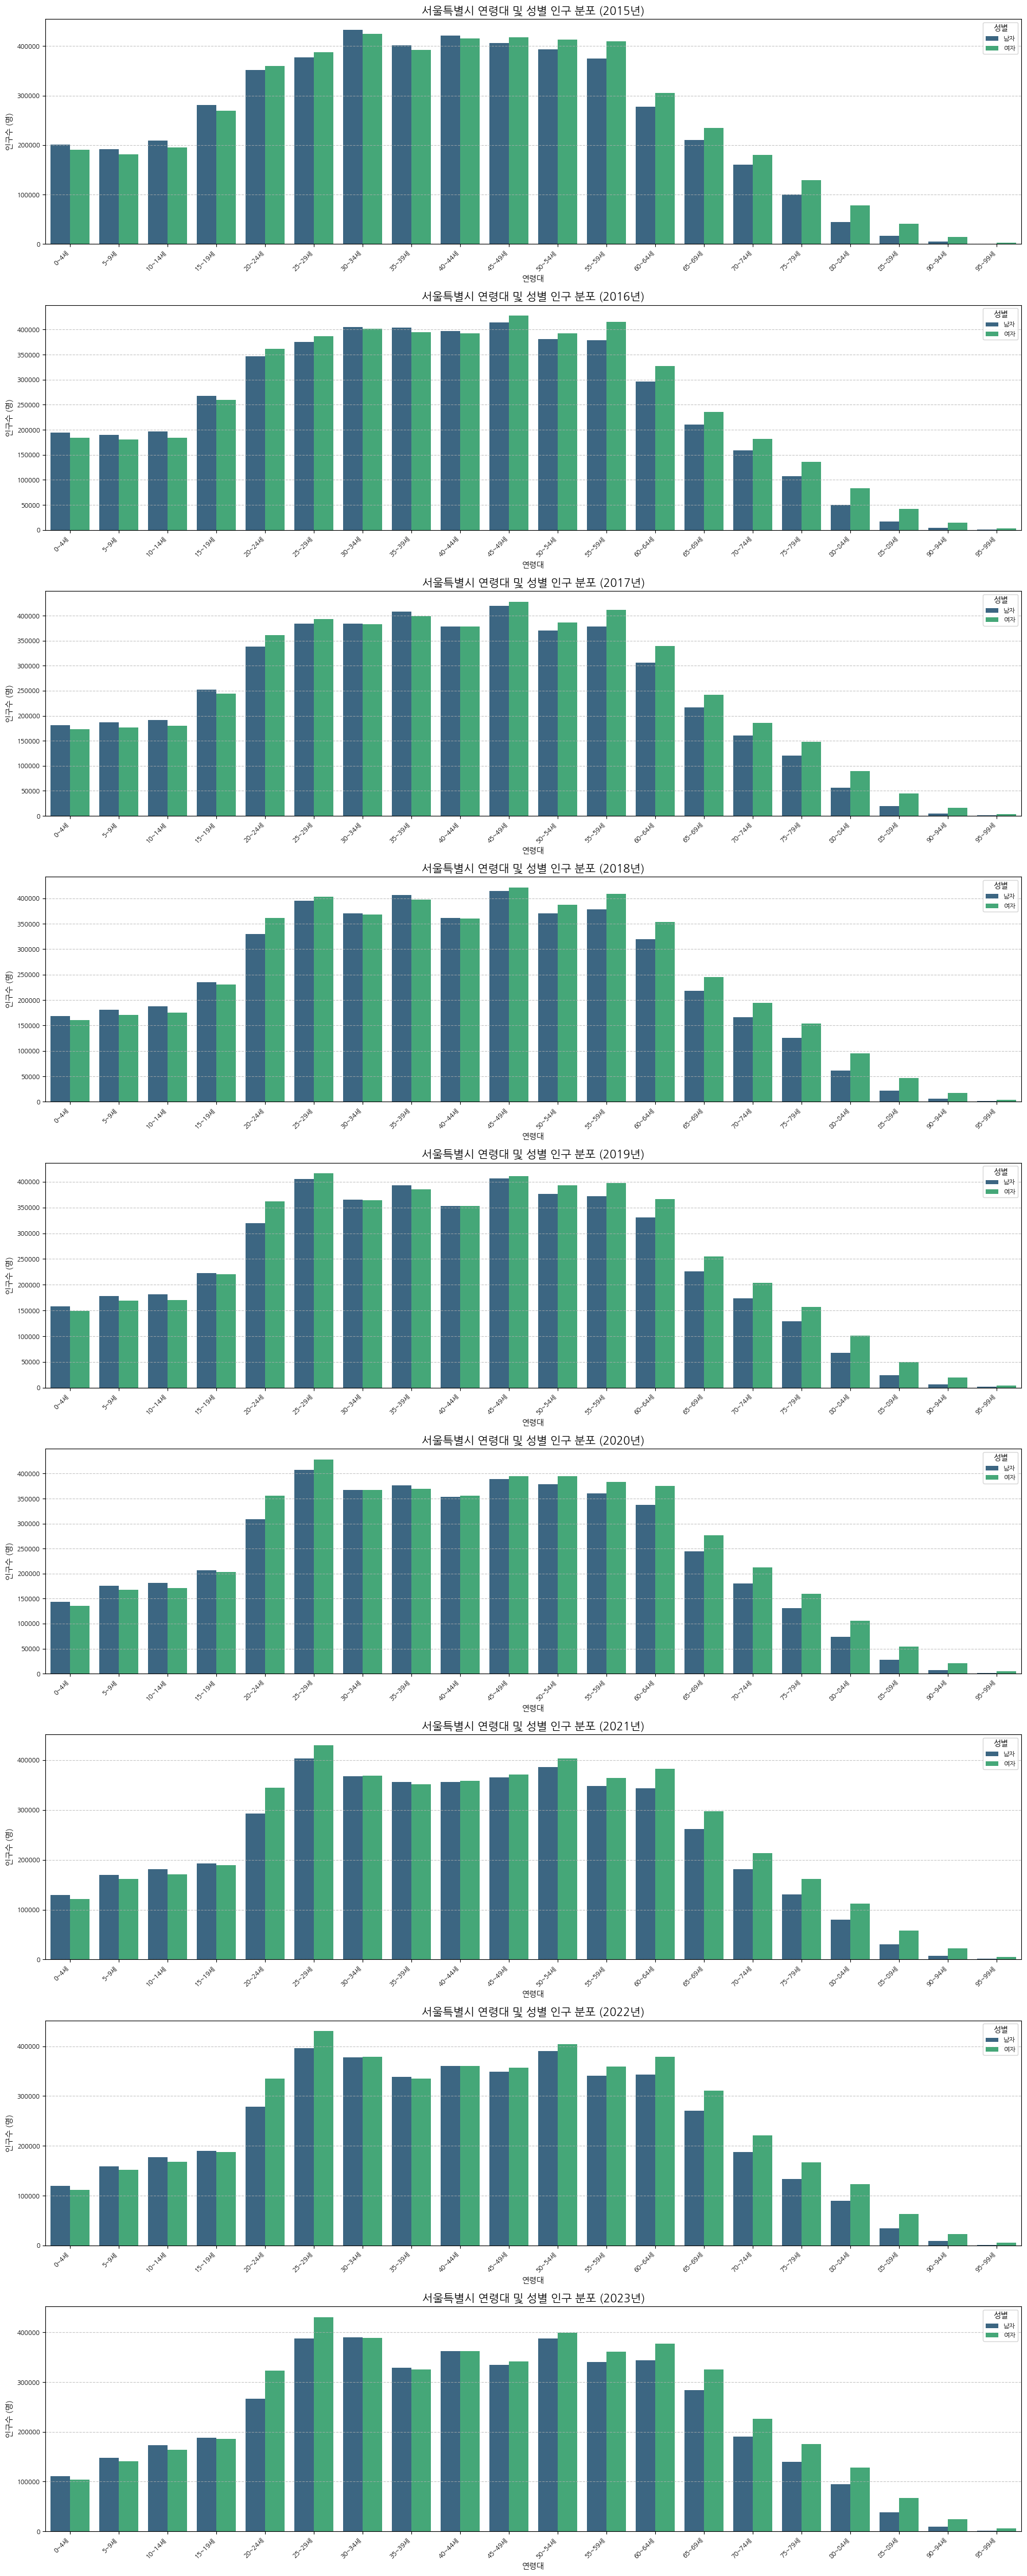

In [51]:
## 서울 지역 연도별 및 성별 인구 시각화

# 시각화를 위해 남자, 여자 총인구 컬럼을 Long 형식으로 변환
seoul_age_gender_melted_for_plot = seoul_age_gender_data_all.melt(
    id_vars=['연령별', '연도'],
    value_vars=['총인구_남자(명)', '총인구_여자(명)'],
    var_name='성별',
    value_name='인구수(명)'
)

# '성별' 컬럼 값 변경 ('총인구_남자(명)' -> '남자', '총인구_여자(명)' -> '여자')
seoul_age_gender_melted_for_plot['성별'] = seoul_age_gender_melted_for_plot['성별'].replace({
    '총인구_남자(명)': '남자',
    '총인구_여자(명)': '여자'
})

# '인구수(명)' 컬럼을 숫자 타입으로 변환
seoul_age_gender_melted_for_plot['인구수(명)'] = pd.to_numeric(seoul_age_gender_melted_for_plot['인구수(명)'], errors='coerce')

# 결측치 채우기
seoul_age_gender_melted_for_plot['인구수(명)'] = seoul_age_gender_melted_for_plot['인구수(명)'].fillna(0)

# '인구수(명)' 컬럼을 정수형으로 변환
seoul_age_gender_melted_for_plot['인구수(명)'] = seoul_age_gender_melted_for_plot['인구수(명)'].astype(int)


# 시각화 설정 - 연도별 서브플롯 생성
years = seoul_age_gender_melted_for_plot['연도'].unique()
n_years = len(years)

plt.figure(figsize=(18, 5 * n_years))  # 전체 figure 크기 조정
for i, year in enumerate(years):
    plt.subplot(n_years, 1, i + 1)  # 서브플롯 생성

    # 해당 연도의 데이터 필터링
    data_year = seoul_age_gender_melted_for_plot[seoul_age_gender_melted_for_plot['연도'] == year]

    sns.barplot(data=data_year,
                x='연령별',
                y='인구수(명)',
                hue='성별',
                palette='viridis',  # 색상 팔레트 설정
                errorbar=None)  # 에러바 표시 안 함

    # 그래프 제목 및 축 라벨 설정
    plt.title(f'서울특별시 연령대 및 성별 인구 분포 ({year}년)', fontsize=14)
    plt.xlabel('연령대', fontsize=10)
    plt.ylabel('인구수 (명)', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=8)  # x축 라벨 회전 및 글자 크기 조정
    plt.yticks(fontsize=8)  # y축 글자 크기 조정
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 표시

    # 범례 설정
    plt.legend(title='성별', fontsize=8)

plt.tight_layout()  # 레이아웃 자동 조정

# 시각화 결과 저장
plt.savefig("seoul_age_gender_distribution.png", dpi=300, bbox_inches="tight")

plt.show()

,연령별,연도,인구수(명),성별,연령대_그룹
0,0~4세,2015,200927,남자,젊은층 (0-19세)
1,0~4세,2016,194318,남자,젊은층 (0-19세)
2,0~4세,2017,181170,남자,젊은층 (0-19세)
3,0~4세,2018,168527,남자,젊은층 (0-19세)
4,0~4세,2019,157770,남자,젊은층 (0-19세)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   연령별     360 non-null    category
 1   연도      360 non-null    int64   
 2   인구수(명)  360 non-null    int64   
 3   성별      360 non-null    object  
 4   연령대_그룹  360 non-null    object  
dtypes: category(1), int64(2), object(2)
memory usage: 12.4+ KB


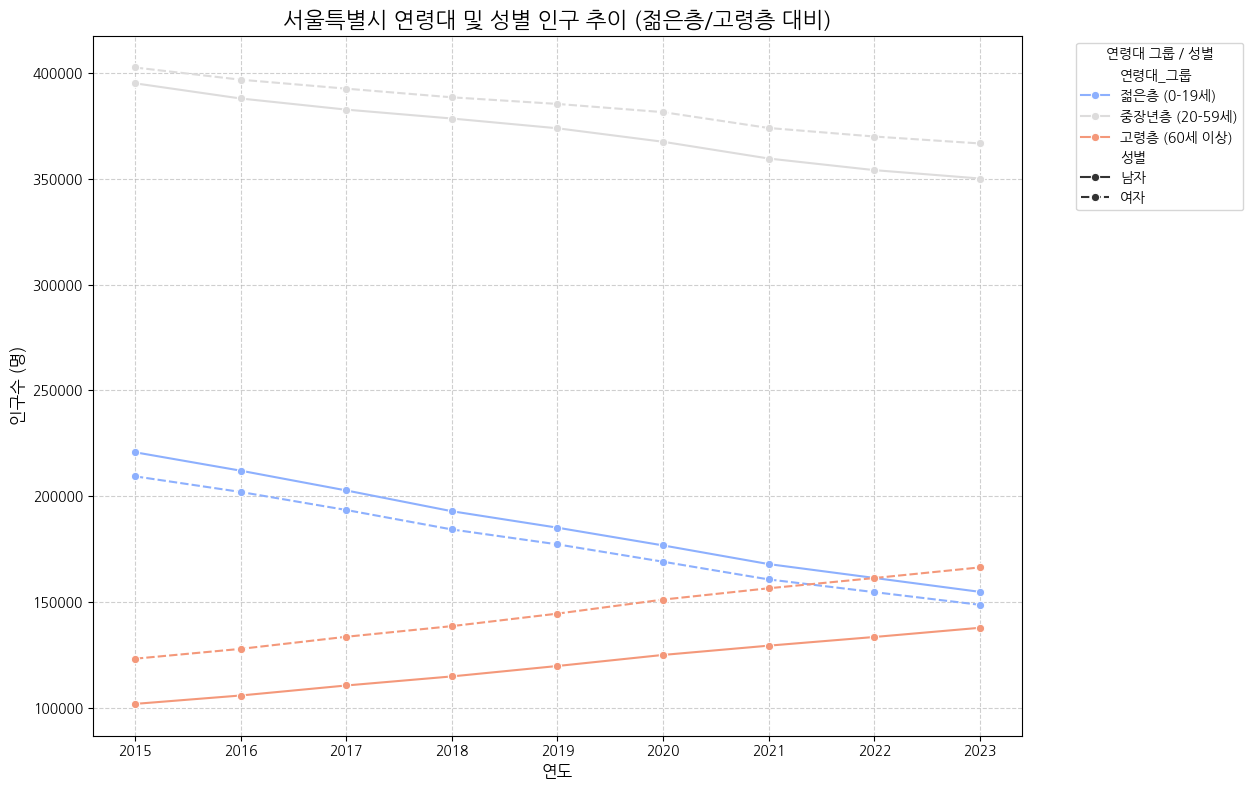

In [52]:
## 서울 지역 연령대 및 성별 인구 추이 시각화

# 데이터를 시각화에 적합한 형태로 재구성 (melt)
seoul_age_gender_melted = seoul_age_gender_data_all.melt(
    id_vars=['연령별', '연도'],
    value_vars=['총인구_남자(명)', '총인구_여자(명)'],
    var_name='성별_원본', # 임시 컬럼 이름
    value_name='인구수(명)'
)

# '성별_원본' 컬럼 값 변경 ('총인구_남자(명)' -> '남자' / '총인구_여자(명)' -> '여자')
seoul_age_gender_melted['성별'] = seoul_age_gender_melted['성별_원본'].replace({
    '총인구_남자(명)': '남자',
    '총인구_여자(명)': '여자'
})

# 불필요한 임시 컬럼 삭제
seoul_age_gender_melted.drop(columns=['성별_원본'], inplace=True)

# '인구수(명)' 컬럼이 숫자로 변환되었는지 확인
seoul_age_gender_melted['인구수(명)'] = pd.to_numeric(seoul_age_gender_melted['인구수(명)'], errors='coerce')
seoul_age_gender_melted.dropna(subset=['인구수(명)'], inplace=True)  # 변환 오류로 생긴 결측치 제거

# 연령대 그룹 컬럼 생성 (젊은층 및 고령층 대비 시각화를 위해)
def age_group_category(age_group):
    if age_group in ['0~4세', '5~9세', '10~14세', '15~19세']:
        return '젊은층 (0-19세)'
    elif age_group in ['60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상']:
        return '고령층 (60세 이상)'
    else:
        return '중장년층 (20-59세)'

seoul_age_gender_melted['연령대_그룹'] = seoul_age_gender_melted['연령별'].apply(age_group_category)

# 연령별 순서가 범주형으로 잘 설정되어 있는지 확인 및 재설정
age_order = ['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세', '35~39세',
             '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세',
             '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상']
seoul_age_gender_melted['연령별'] = pd.Categorical(seoul_age_gender_melted['연령별'], categories=age_order, ordered=True)
seoul_age_gender_melted.dropna(subset=['연령별'], inplace=True)  # 범주형으로 전환 후 결측치 제거

# 시각화 데이터프레임 확인
display(seoul_age_gender_melted.head())
seoul_age_gender_melted.info()


# 꺾은 선 그래프로 시각화
plt.figure(figsize=(15, 8))

# 연령대 그룹 및 성별 구분
sns.lineplot(data=seoul_age_gender_melted,
             x='연도',
             y='인구수(명)',
             hue='연령대_그룹',   # 연령대 그룹별 색상 구분
             style='성별',      # 성별별 선 스타일 구분 (남자: 실선, 여자: 점선)
             marker='o',
             palette='coolwarm',  # 대비되는 색상 팔레트 사용
             errorbar=None)

# 그래프 제목 및 축 라벨 설정
plt.title('서울특별시 연령대 및 성별 인구 추이 (젊은층/고령층 대비)', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('인구수 (명)', fontsize=12)

# X축 눈금을 정수 연도로 표시
if not seoul_age_gender_melted['연도'].empty:
    plt.xticks(np.arange(seoul_age_gender_melted['연도'].min(), seoul_age_gender_melted['연도'].max() + 1, 1))

plt.grid(True, linestyle='--', alpha=0.6)  # 그리드 표시

# 범례 위치 조정
plt.legend(title='연령대 그룹 / 성별', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


plt.tight_layout(rect=[0, 0, 0.85, 1])  # 범례 공간 확보

# 시각화 결과 저장
plt.savefig("seoul_age_gender_change.png", dpi=300, bbox_inches="tight")

plt.show()

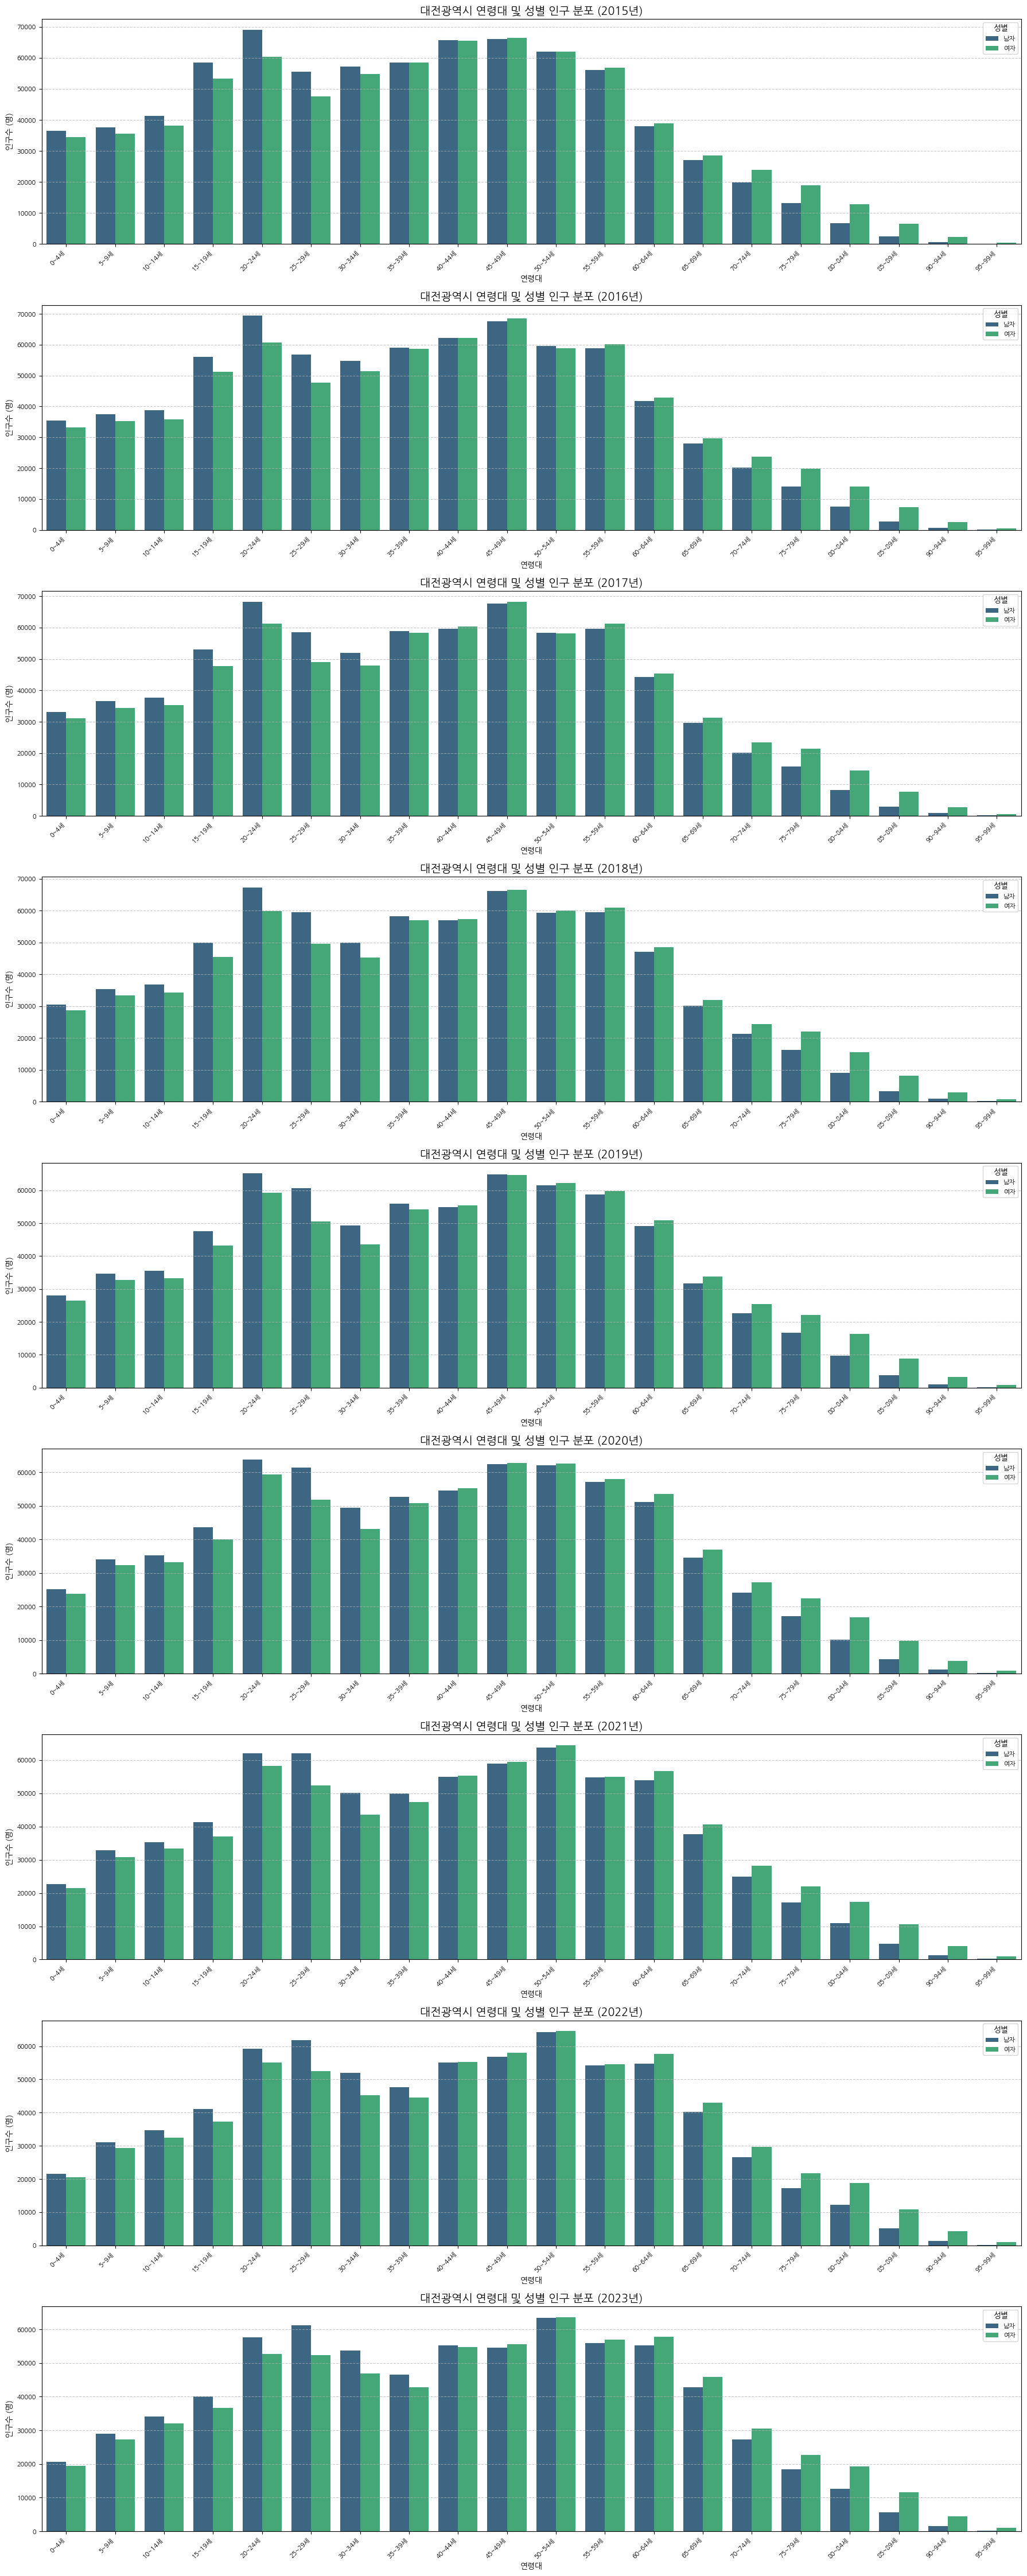

In [53]:
## 대전 지역 연령 및 성별 인구 시각화

# 대전 지역 데이터 필터링
daejeon_df = final_merged_df_filtered[final_merged_df_filtered['지역'] == '대전광역시'].copy()

# 대전 데이터에서 '합계' 연령 행 제외 및 필요한 컬럼 선택
daejeon_age_gender_data_all = daejeon_df[~daejeon_df['연령별'].isin(['합계', '평균연령', '중위연령'])][['연령별', '연도', '총인구_남자(명)', '총인구_여자(명)']].copy()

# 연령별 순서 정렬
age_order = ['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세', '35~39세',
             '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세',
             '75~79세', '80~84세', '85~89세', '90~94세', '95~99세',]

# 연령별 순서를 범주형으로 지정하여 시각화 순서 제어
daejeon_age_gender_data_all['연령별'] = pd.Categorical(daejeon_age_gender_data_all['연령별'], categories=age_order, ordered=True)

# 결측치 제거
daejeon_age_gender_data_all.dropna(subset=['연령별'], inplace=True)


# 시각화를 위해 남자, 여자 총인구 컬럼을 Long 형식으로 변환
daejeon_age_gender_melted_for_plot = daejeon_age_gender_data_all.melt(
    id_vars=['연령별', '연도'],
    value_vars=['총인구_남자(명)', '총인구_여자(명)'],
    var_name='성별',
    value_name='인구수(명)'
)

# '성별' 컬럼 값 변경 ('총인구_남자(명)' -> '남자' /  '총인구_여자(명)' -> '여자')
daejeon_age_gender_melted_for_plot['성별'] = daejeon_age_gender_melted_for_plot['성별'].replace({
    '총인구_남자(명)': '남자',
    '총인구_여자(명)': '여자'
})

# '인구수(명)' 컬럼을 숫자 타입으로 변환
daejeon_age_gender_melted_for_plot['인구수(명)'] = pd.to_numeric(daejeon_age_gender_melted_for_plot['인구수(명)'], errors='coerce')

# 결측치 채우기
daejeon_age_gender_melted_for_plot['인구수(명)'] = daejeon_age_gender_melted_for_plot['인구수(명)'].fillna(0)

# '인구수(명)' 컬럼을 정수형으로 변환
daejeon_age_gender_melted_for_plot['인구수(명)'] = daejeon_age_gender_melted_for_plot['인구수(명)'].astype(int)


# 시각화 설정: 연도별 서브플롯 생성
years_daejeon = daejeon_age_gender_melted_for_plot['연도'].unique()
n_years_daejeon = len(years_daejeon)

plt.figure(figsize=(18, 5 * n_years_daejeon))
for i, year in enumerate(years_daejeon):
    plt.subplot(n_years_daejeon, 1, i + 1)

    # 해당 연도의 데이터 필터링
    data_year_daejeon = daejeon_age_gender_melted_for_plot[daejeon_age_gender_melted_for_plot['연도'] == year]

    sns.barplot(data=data_year_daejeon,
                x='연령별',
                y='인구수(명)',
                hue='성별',
                palette='viridis',
                errorbar=None)

    # 그래프 제목 및 축 라벨 설정
    plt.title(f'대전광역시 연령대 및 성별 인구 분포 ({year}년)', fontsize=14)
    plt.xlabel('연령대', fontsize=10)
    plt.ylabel('인구수 (명)', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 범례 설정
    plt.legend(title='성별', fontsize=8)

plt.tight_layout()

# 시각화 결과 저장
plt.savefig("daejeon_age_gender_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

,연령별,연도,인구수(명),성별,연령대_그룹
0,0~4세,2015,36522,남자,젊은층 (0-19세)
1,0~4세,2016,35442,남자,젊은층 (0-19세)
2,0~4세,2017,33069,남자,젊은층 (0-19세)
3,0~4세,2018,30594,남자,젊은층 (0-19세)
4,0~4세,2019,28033,남자,젊은층 (0-19세)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   연령별     360 non-null    category
 1   연도      360 non-null    int64   
 2   인구수(명)  360 non-null    int64   
 3   성별      360 non-null    object  
 4   연령대_그룹  360 non-null    object  
dtypes: category(1), int64(2), object(2)
memory usage: 12.4+ KB


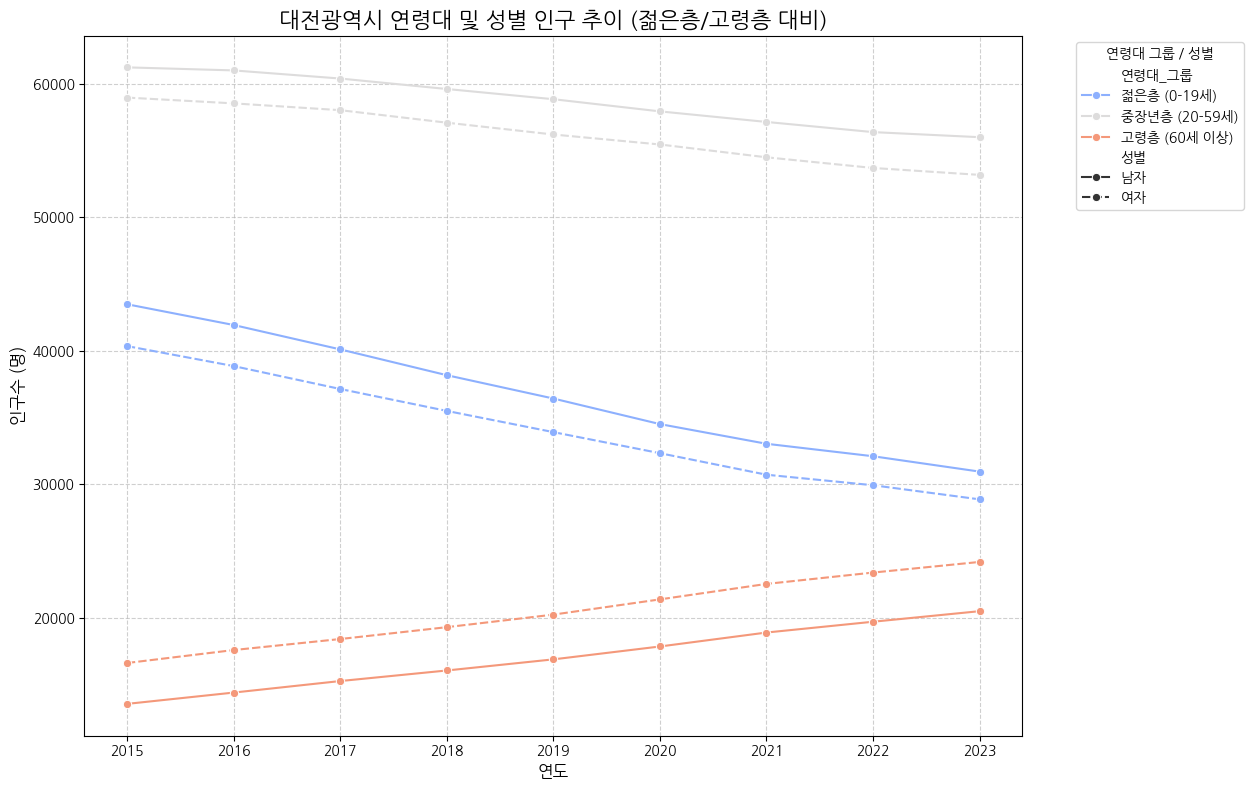

In [54]:
## 대전 지역 연령대별 및 성별 인구 추이 시각화

# 데이터를 시각화에 적합한 형태로 재구성 (melt)
daejeon_age_gender_melted = daejeon_age_gender_data_all.melt(
    id_vars=['연령별', '연도'],
    value_vars=['총인구_남자(명)', '총인구_여자(명)'],
    var_name='성별_원본',
    value_name='인구수(명)'
)

# '성별_원본' 컬럼 값 변경 ('총인구_남자(명)' -> '남자'/ '총인구_여자(명)' -> '여자')
daejeon_age_gender_melted['성별'] = daejeon_age_gender_melted['성별_원본'].replace({
    '총인구_남자(명)': '남자',
    '총인구_여자(명)': '여자'
})

# 불필요한 임시 컬럼 삭제
daejeon_age_gender_melted.drop(columns=['성별_원본'], inplace=True)

# '인구수(명)' 컬럼이 숫자로 변환되었는지 확인
daejeon_age_gender_melted['인구수(명)'] = pd.to_numeric(daejeon_age_gender_melted['인구수(명)'], errors='coerce')
daejeon_age_gender_melted.dropna(subset=['인구수(명)'], inplace=True)

# 연령대 그룹 컬럼 생성 (젊은층 및 고령층 대비 시각화를 위해)
def age_group_category(age_group):
    if age_group in ['0~4세', '5~9세', '10~14세', '15~19세']:
        return '젊은층 (0-19세)'
    elif age_group in ['60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상']:
        return '고령층 (60세 이상)'
    else:
        return '중장년층 (20-59세)'

daejeon_age_gender_melted['연령대_그룹'] = daejeon_age_gender_melted['연령별'].apply(age_group_category)

# 연령별 순서가 범주형으로 잘 설정되어 있는지 확인 및 재설정
age_order = ['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세', '35~39세',
             '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세',
             '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상']
daejeon_age_gender_melted['연령별'] = pd.Categorical(daejeon_age_gender_melted['연령별'], categories=age_order, ordered=True)
daejeon_age_gender_melted.dropna(subset=['연령별'], inplace=True)

# 시각화 데이터프레임 확인
display(daejeon_age_gender_melted.head())
daejeon_age_gender_melted.info()


# 꺾은선 그래프로 시각화
plt.figure(figsize=(15, 8))

# 연령대 그룹 및 성별 구분
sns.lineplot(data=daejeon_age_gender_melted,
             x='연도',
             y='인구수(명)',
             hue='연령대_그룹',
             style='성별',
             marker='o',
             palette='coolwarm',
             errorbar=None)

# 그래프 제목 및 축 라벨 설정
plt.title('대전광역시 연령대 및 성별 인구 추이 (젊은층/고령층 대비)', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('인구수 (명)', fontsize=12)

# X축 눈금을 정수 연도로 표시
if not seoul_age_gender_melted['연도'].empty:
    plt.xticks(np.arange(daejeon_age_gender_melted['연도'].min(), daejeon_age_gender_melted['연도'].max() + 1, 1))

plt.grid(True, linestyle='--', alpha=0.6)

# 범례 위치 조정
plt.legend(title='연령대 그룹 / 성별', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout(rect=[0, 0, 0.85, 1])

# 시각화 결과 저장
plt.savefig("daejeon_age_gender_change.png", dpi=300, bbox_inches="tight")

plt.show()

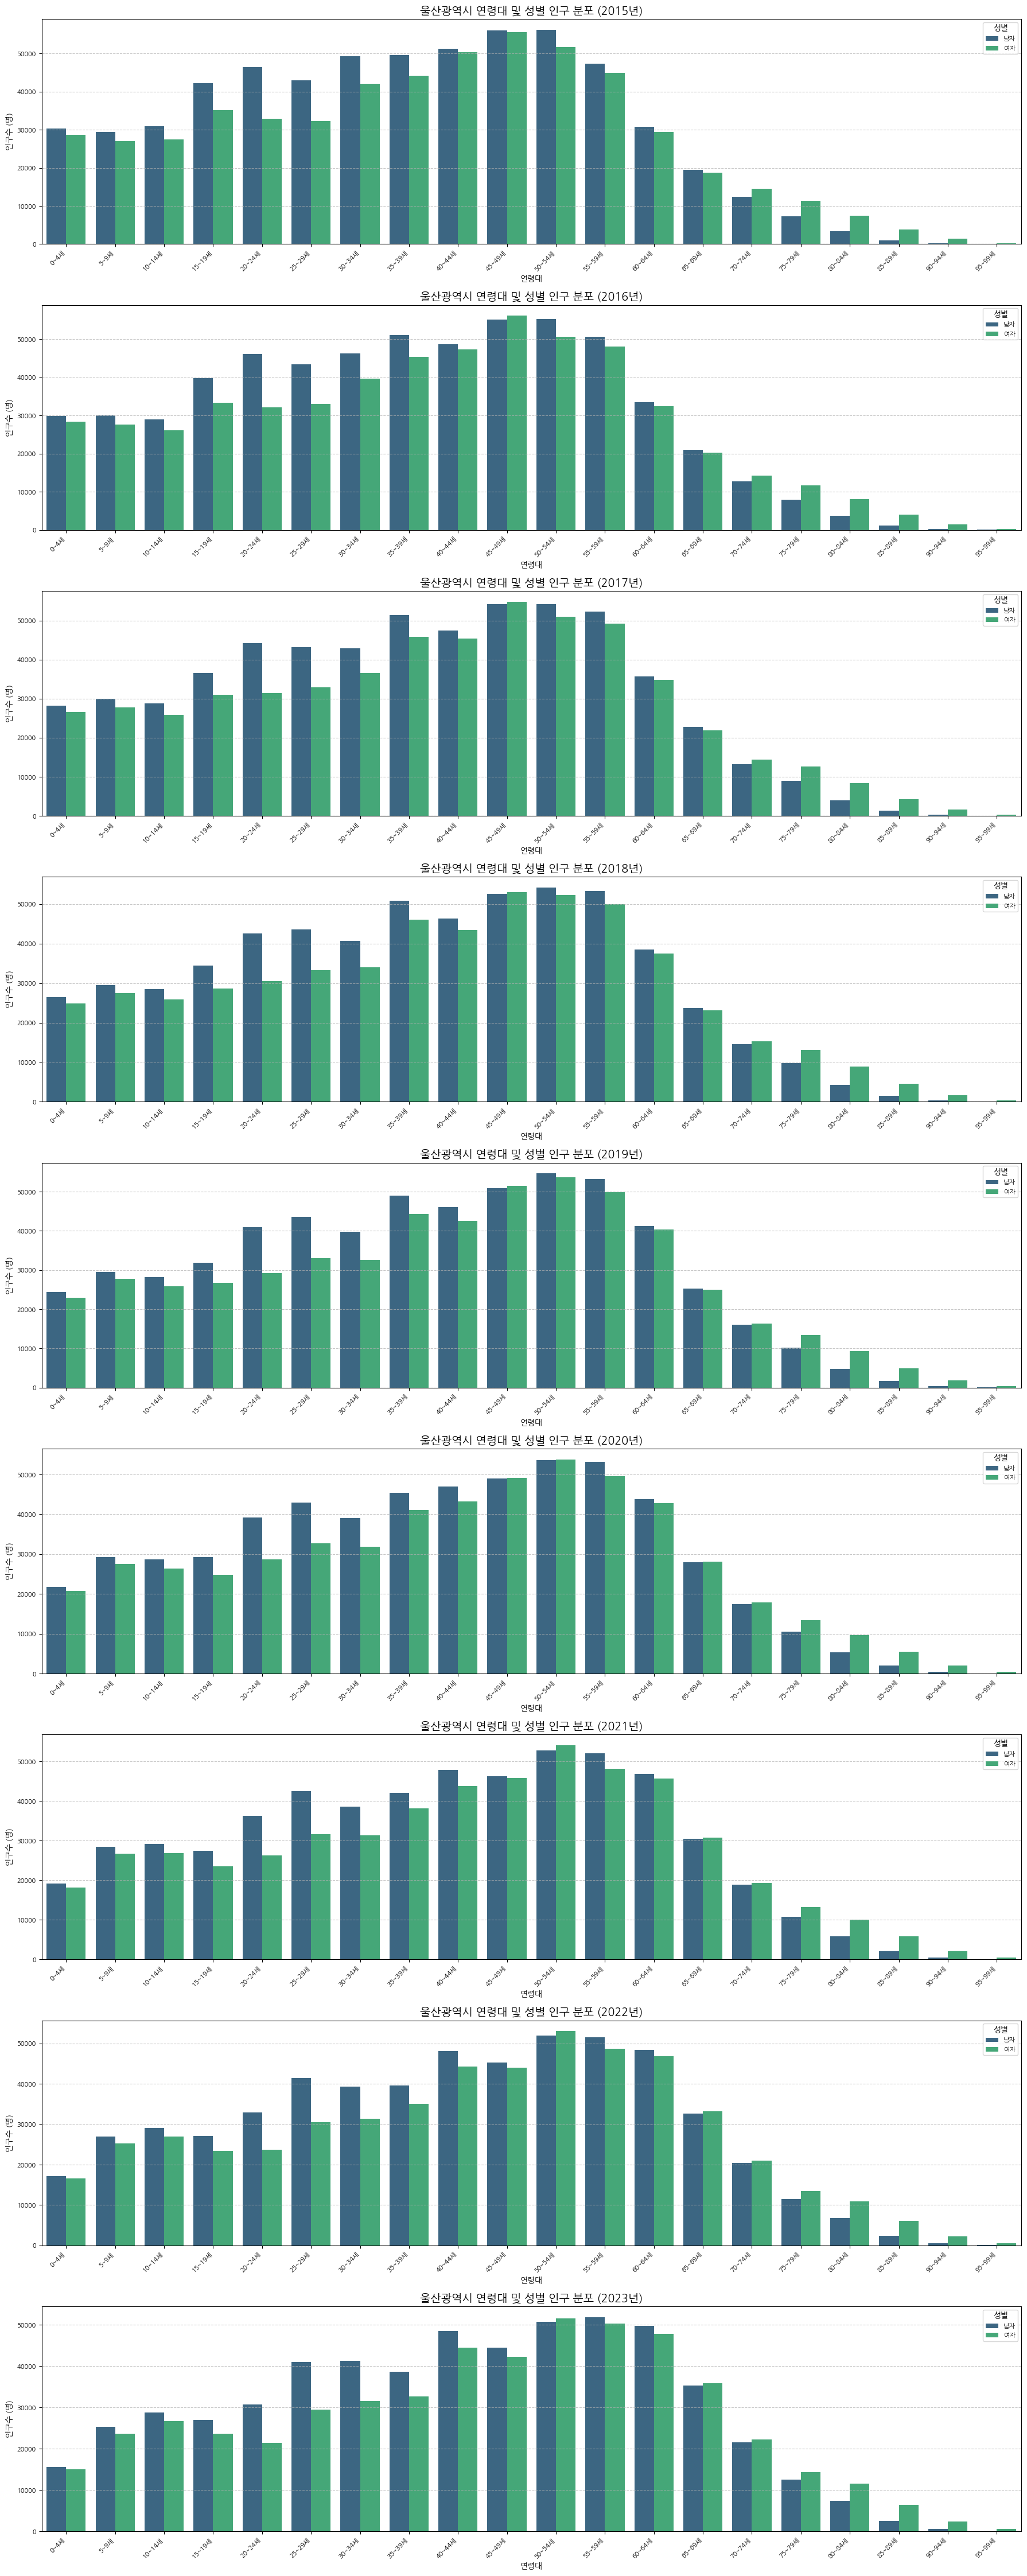

In [55]:
## 울산 지역 연령 및 성별 인구 시각화

# 울산 지역 데이터 필터링
ulsan_df = final_merged_df_filtered[final_merged_df_filtered['지역'] == '울산광역시'].copy()

# 울산 데이터에서 '합계' 연령 행 제외 및 필요한 컬럼 선택
ulsan_age_gender_data_all = ulsan_df[~ulsan_df['연령별'].isin(['합계', '평균연령', '중위연령'])][['연령별', '연도', '총인구_남자(명)', '총인구_여자(명)']].copy()

# 연령별 순서 정렬
age_order = ['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세', '35~39세',
             '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세',
             '75~79세', '80~84세', '85~89세', '90~94세', '95~99세']

# 연령별 순서를 범주형으로 지정하여 시각화 순서 제어
ulsan_age_gender_data_all['연령별'] = pd.Categorical(ulsan_age_gender_data_all['연령별'], categories=age_order, ordered=True)

# 결측치 제거
ulsan_age_gender_data_all.dropna(subset=['연령별'], inplace=True)

# 시각화를 위해 남자, 여자 총인구 컬럼을 Long 형식으로 변환
ulsan_age_gender_melted_for_plot = ulsan_age_gender_data_all.melt(
    id_vars=['연령별', '연도'],
    value_vars=['총인구_남자(명)', '총인구_여자(명)'],
    var_name='성별',
    value_name='인구수(명)'
)

# '성별' 컬럼 값 변경 ('총인구_남자(명)' -> '남자' / '총인구_여자(명)' -> '여자')
ulsan_age_gender_melted_for_plot['성별'] = ulsan_age_gender_melted_for_plot['성별'].replace({
    '총인구_남자(명)': '남자',
    '총인구_여자(명)': '여자'
})

# '인구수(명)' 컬럼을 숫자 타입으로 변환
ulsan_age_gender_melted_for_plot['인구수(명)'] = pd.to_numeric(ulsan_age_gender_melted_for_plot['인구수(명)'], errors='coerce')

# 결측치 채우기
ulsan_age_gender_melted_for_plot['인구수(명)'] = ulsan_age_gender_melted_for_plot['인구수(명)'].fillna(0)

# '인구수(명)' 컬럼을 정수형으로 변환
ulsan_age_gender_melted_for_plot['인구수(명)'] = ulsan_age_gender_melted_for_plot['인구수(명)'].astype(int)


# 시각화 설정 - 연도별 서브플롯 생성
years_ulsan = ulsan_age_gender_melted_for_plot['연도'].unique()
n_years_ulsan = len(years_ulsan)

plt.figure(figsize=(18, 5 * n_years_ulsan))
for i, year in enumerate(years_ulsan):
    plt.subplot(n_years_ulsan, 1, i + 1)

    # 해당 연도의 데이터 필터링
    data_year_ulsan = ulsan_age_gender_melted_for_plot[ulsan_age_gender_melted_for_plot['연도'] == year]

    sns.barplot(data=data_year_ulsan,
                x='연령별',
                y='인구수(명)',
                hue='성별',
                palette='viridis',
                errorbar=None)

    # 그래프 제목 및 축 라벨 설정
    plt.title(f'울산광역시 연령대 및 성별 인구 분포 ({year}년)', fontsize=14)
    plt.xlabel('연령대', fontsize=10)
    plt.ylabel('인구수 (명)', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 범례 설정
    plt.legend(title='성별', fontsize=8)

plt.tight_layout()

# 시각화 결과 저장
plt.savefig("ulsan_age_gender_distribution.png", dpi=300, bbox_inches="tight")

plt.show()

,연령별,연도,인구수(명),성별,연령대_그룹
0,0~4세,2015,30399,남자,젊은층 (0-19세)
1,0~4세,2016,29866,남자,젊은층 (0-19세)
2,0~4세,2017,28223,남자,젊은층 (0-19세)
3,0~4세,2018,26424,남자,젊은층 (0-19세)
4,0~4세,2019,24435,남자,젊은층 (0-19세)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   연령별     360 non-null    category
 1   연도      360 non-null    int64   
 2   인구수(명)  360 non-null    int64   
 3   성별      360 non-null    object  
 4   연령대_그룹  360 non-null    object  
dtypes: category(1), int64(2), object(2)
memory usage: 12.4+ KB


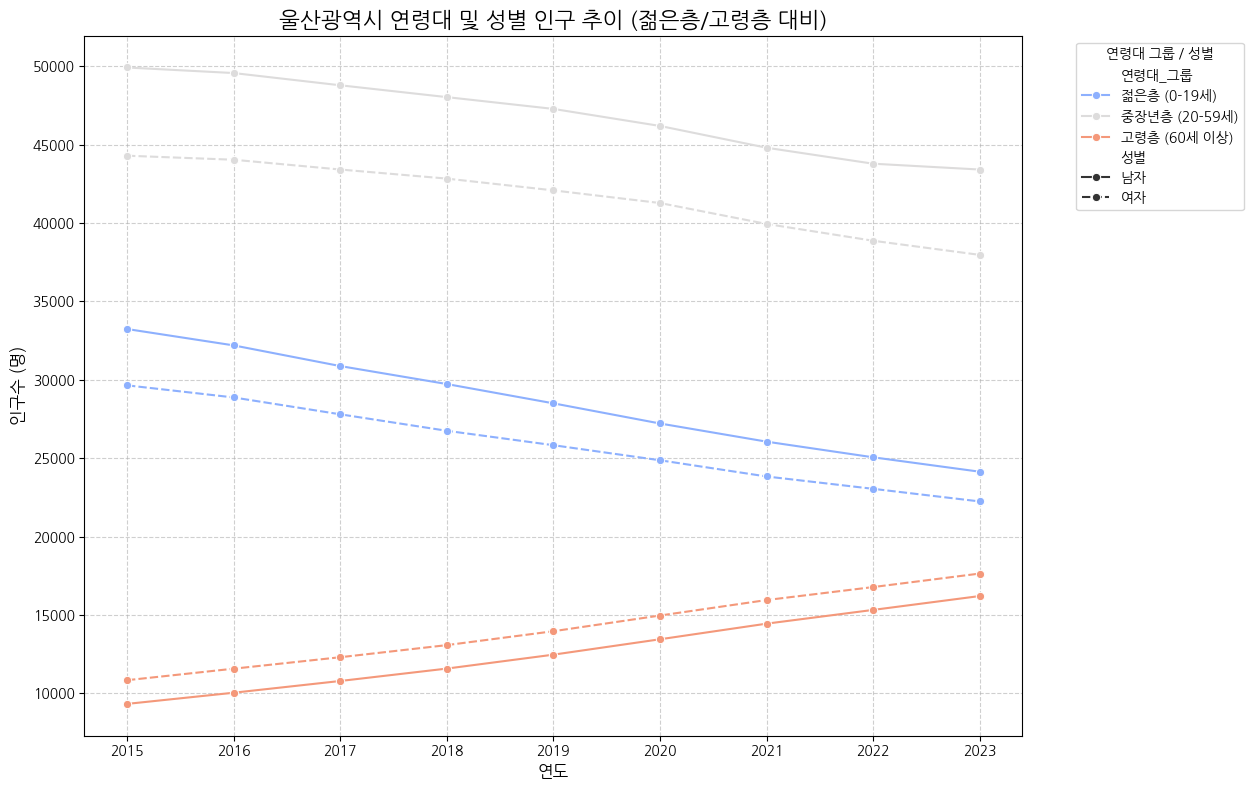

In [56]:
## 울산 지역 연령대별 및 성별 인구 추이 시각화

# 데이터를 시각화에 적합한 형태로 재구성 (melt)
ulsan_age_gender_melted = ulsan_age_gender_data_all.melt(
    id_vars=['연령별', '연도'],
    value_vars=['총인구_남자(명)', '총인구_여자(명)'],
    var_name='성별_원본',
    value_name='인구수(명)'
)

# '성별_원본' 컬럼 값 변경 ('총인구_남자(명)' -> '남자' / '총인구_여자(명)' -> '여자')
ulsan_age_gender_melted['성별'] = ulsan_age_gender_melted['성별_원본'].replace({
    '총인구_남자(명)': '남자',
    '총인구_여자(명)': '여자'
})

# 3. 불필요한 임시 컬럼 삭제
ulsan_age_gender_melted.drop(columns=['성별_원본'], inplace=True)

# '인구수(명)' 컬럼이 숫자로 변환되었는지 확인
ulsan_age_gender_melted['인구수(명)'] = pd.to_numeric(ulsan_age_gender_melted['인구수(명)'], errors='coerce')
ulsan_age_gender_melted.dropna(subset=['인구수(명)'], inplace=True)

# 연령대 그룹 컬럼 생성 (젊은층 및 고령층 대비 시각화를 위해)
def age_group_category(age_group):
    if age_group in ['0~4세', '5~9세', '10~14세', '15~19세']:
        return '젊은층 (0-19세)'
    elif age_group in ['60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상']:
        return '고령층 (60세 이상)'
    else:
        return '중장년층 (20-59세)'

ulsan_age_gender_melted['연령대_그룹'] = ulsan_age_gender_melted['연령별'].apply(age_group_category)

# 연령별 순서가 범주형으로 잘 설정되어 있는지 확인 및 재설정
age_order = ['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세', '35~39세',
             '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세',
             '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상']
ulsan_age_gender_melted['연령별'] = pd.Categorical(ulsan_age_gender_melted['연령별'], categories=age_order, ordered=True)
ulsan_age_gender_melted.dropna(subset=['연령별'], inplace=True)

# 시각화 데이터프레임 확인
display(ulsan_age_gender_melted.head())
ulsan_age_gender_melted.info()


# 꺾은선 그래프를 통한 시각화
plt.figure(figsize=(15, 8))

# 연령대 그룹 및 성별 구분
sns.lineplot(data=ulsan_age_gender_melted,
             x='연도',
             y='인구수(명)',
             hue='연령대_그룹',
             style='성별',
             marker='o',
             palette='coolwarm',
             errorbar=None)

# 그래프 제목 및 축 라벨 설정
plt.title('울산광역시 연령대 및 성별 인구 추이 (젊은층/고령층 대비)', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('인구수 (명)', fontsize=12)

# X축 눈금을 정수 연도로 표시
if not seoul_age_gender_melted['연도'].empty:
    plt.xticks(np.arange(ulsan_age_gender_melted['연도'].min(), ulsan_age_gender_melted['연도'].max() + 1, 1))

plt.grid(True, linestyle='--', alpha=0.6)

# 범례 위치 조정
plt.legend(title='연령대 그룹 / 성별', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


plt.tight_layout(rect=[0, 0, 0.85, 1])

# 시각화 결과 저장
plt.savefig("ulsan_age_gender_change.png", dpi=300, bbox_inches="tight")

plt.show()


저령층/고령층 합계 인구 데이터:
      지역    연도        연령대_그룹  인구수(명)
0  대전광역시  2015  고령층 (60세 이상)  241112
1  대전광역시  2015   젊은층 (0-19세)  335396
2  대전광역시  2016  고령층 (60세 이상)  255654
3  대전광역시  2016   젊은층 (0-19세)  323182
4  대전광역시  2017  고령층 (60세 이상)  269179
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      54 non-null     object
 1   연도      54 non-null     int64 
 2   연령대_그룹  54 non-null     object
 3   인구수(명)  54 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.8+ KB
None


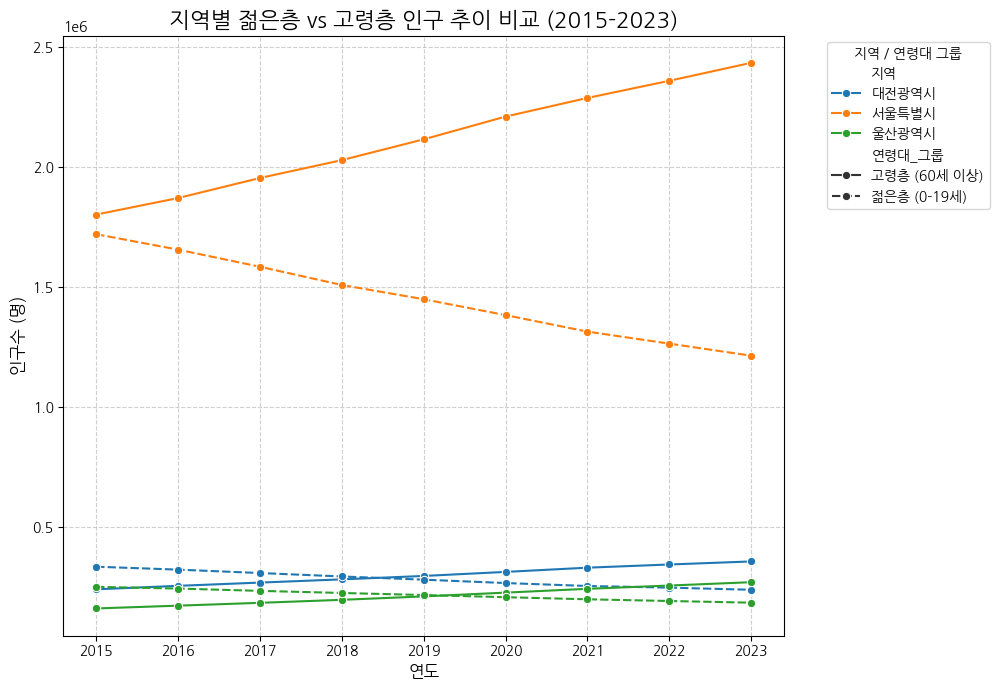

In [57]:
## 모든 지역 젊은층 vs 고령층 인구 추이 비교 시각화를 위한 데이터 전처리

# '연령별' 컬럼을 기반으로 '연령대_그룹' 컬럼 생성
def categorize_age_group(age_str):
    if '~' in age_str:
        start_age = int(age_str.split('~')[0])
        if start_age <= 19:
            return '젊은층 (0-19세)'
        elif start_age >= 60:
            return '고령층 (60세 이상)'
    return '기타'  # 저령층, 고령층에 속하지 않는 연령대

# 필요한 컬럼만 선택하여 복사
population_data = final_merged_df_filtered[['지역', '연도', '연령별', '총인구(명)']].copy()

# '연령대_그룹' 컬럼 생성
population_data['연령대_그룹'] = population_data['연령별'].apply(categorize_age_group)

# 시각화에 불필요한 연령대 제외
population_data_filtered = population_data[
    ~population_data['연령별'].isin(['합계', '평균연령', '중위연령', '100세 이상'])
].copy()

# 저령층과 고령층 데이터만 선택
all_regions_age_gender_melted = population_data_filtered[
    population_data_filtered['연령대_그룹'].isin(['젊은층 (0-19세)', '고령층 (60세 이상)'])
].copy()

# '인구수(명)' 컬럼명을 '총인구(명)'에서 변경
all_regions_age_gender_melted.rename(columns={'총인구(명)': '인구수(명)'}, inplace=True)

# '지역', '연도', '연령대_그룹' 기준으로 그룹화하고 '인구수(명)'의 합계 계산
young_old_population_summary = all_regions_age_gender_melted.groupby(
    ['지역', '연도', '연령대_그룹']
)['인구수(명)'].sum().reset_index()

print("\n저령층/고령층 합계 인구 데이터:")
print(young_old_population_summary.head())
print(young_old_population_summary.info())

# 모든 지역의 젊은층/고령층 추이 비교 시각화 (seaborn의 lineplot 사용)
plt.figure(figsize=(12, 7))

sns.lineplot(data=young_old_population_summary,
              x='연도',
              y='인구수(명)',
              hue='지역',
              style='연령대_그룹',
              marker='o',
              errorbar=None)

# 그래프 제목 및 축 라벨 설정
plt.title('지역별 젊은층 vs 고령층 인구 추이 비교 (2015-2023)', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('인구수 (명)', fontsize=12)

# X축 눈금을 정수 연도로 표시
min_year = young_old_population_summary['연도'].min()
max_year = young_old_population_summary['연도'].max()
plt.xticks(np.arange(min_year, max_year + 1, 1))

plt.grid(True, linestyle='--', alpha=0.6)

# 범례 위치 조정
plt.legend(title='지역 / 연령대 그룹', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout(rect=[0, 0, 0.85, 1])

# 시각화 결과 저장
plt.savefig("all_regions_age_change_comparison.png", dpi=300, bbox_inches="tight")

plt.show()

combined_demographic_data 데이터프레임 생성 완료.
      지역    연도   연령별  성별  인구수(명)
0  대전광역시  2015  0~4세  남자   36522
1  대전광역시  2016  0~4세  남자   35442
2  대전광역시  2017  0~4세  남자   33069
3  대전광역시  2018  0~4세  남자   30594
4  대전광역시  2019  0~4세  남자   28033


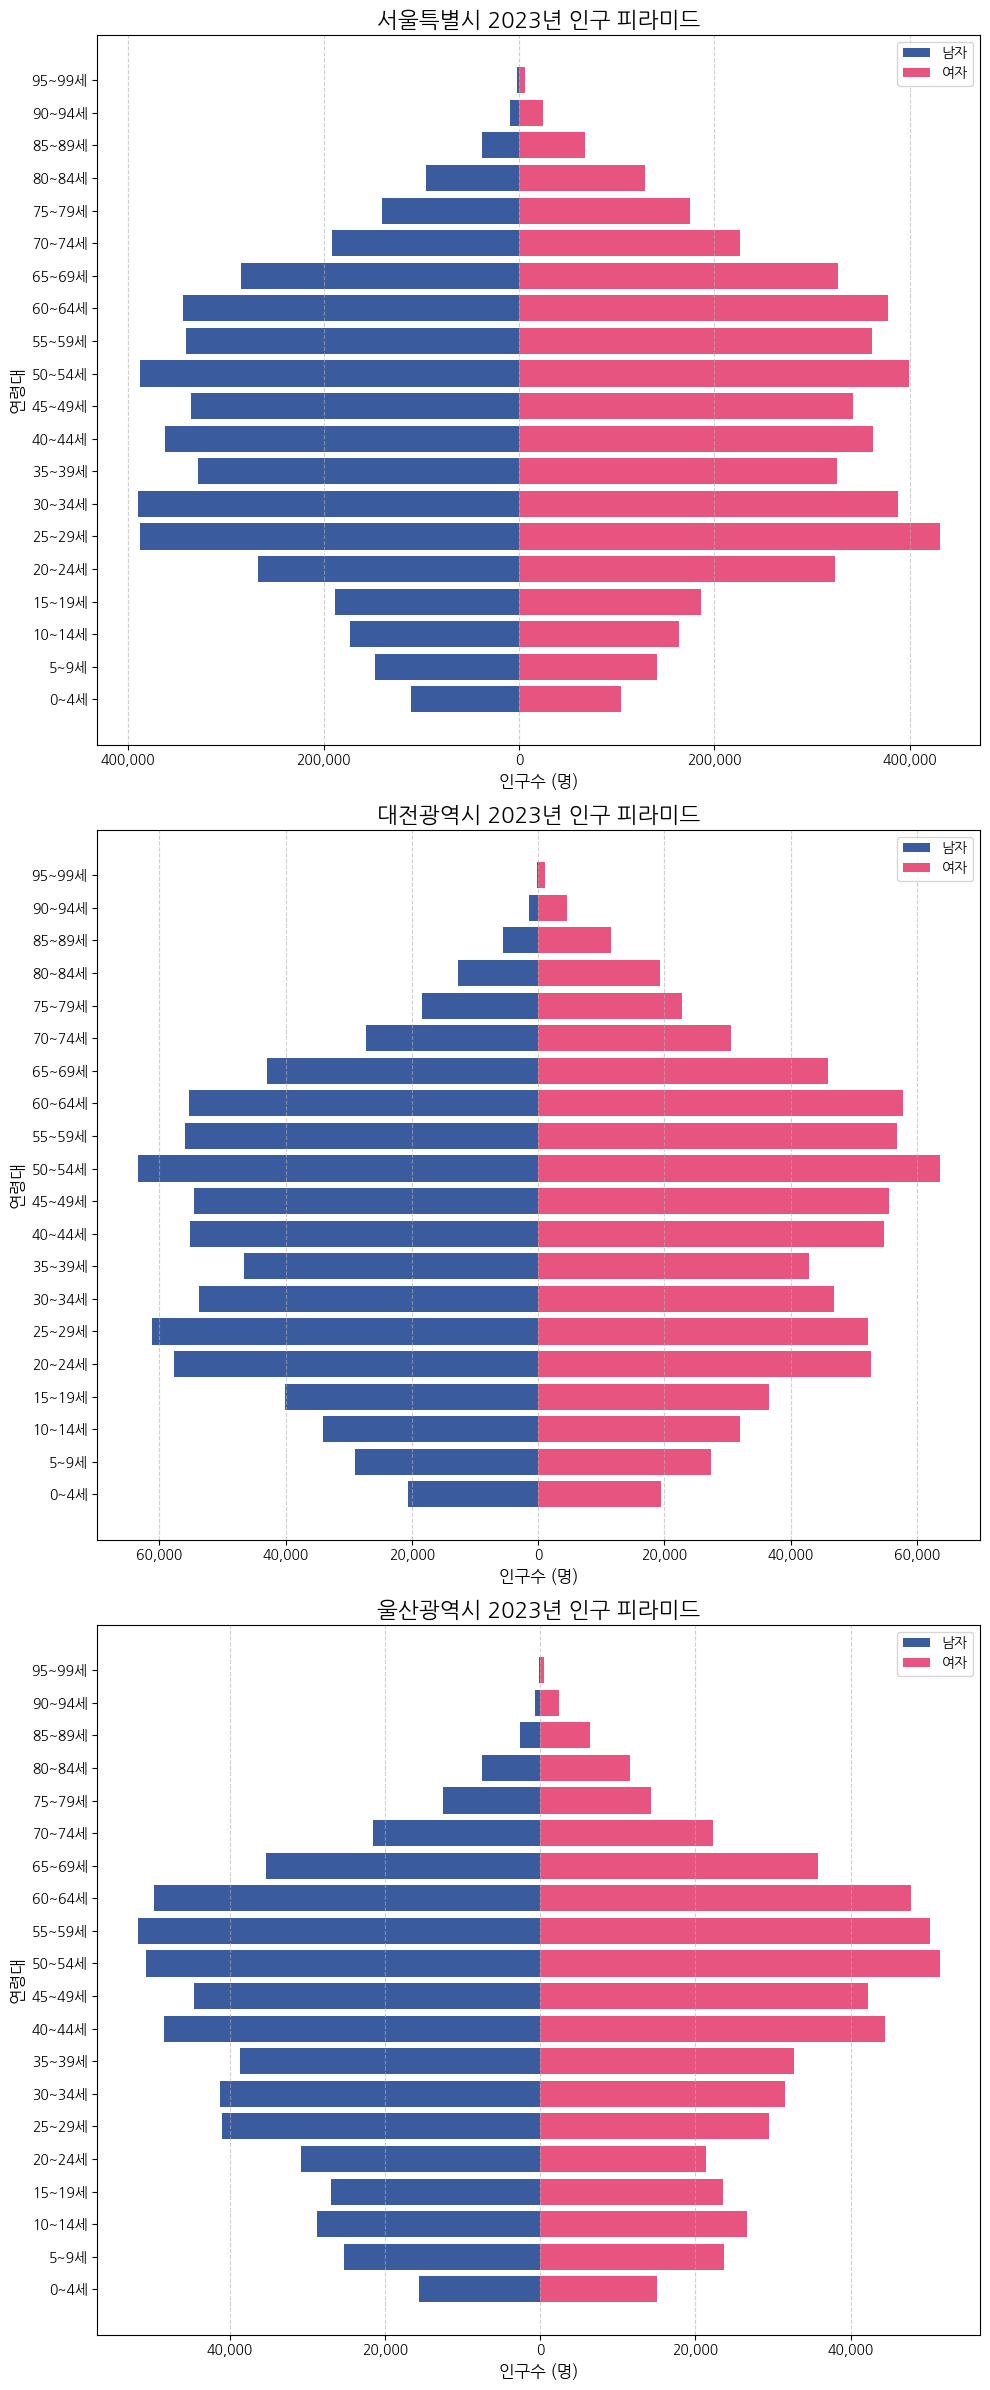

In [58]:
## 인구 피라미드 시각화

#  인구 피라미드 시각화 데이터 전처리
combined_demographic_data = final_merged_df_filtered.melt(
    id_vars=['지역', '연도', '연령별'],
    value_vars=['총인구_남자(명)', '총인구_여자(명)'],
    var_name='성별',
    value_name='인구수(명)'
)

# '성별' 컬럼 값 변경 ('총인구_남자(명)' -> '남자' / '총인구_여자(명)' -> '여자')
combined_demographic_data['성별'] = combined_demographic_data['성별'].replace({
    '총인구_남자(명)': '남자',
    '총인구_여자(명)': '여자'
})

print("combined_demographic_data 데이터프레임 생성 완료.")
print(combined_demographic_data.head())


# 시각화할 지역 및 연도 설정
target_regions = ['서울특별시', '대전광역시', '울산광역시']
target_year = 2023

# 전체 figure 크기 및 서브플롯 설정
fig, axes = plt.subplots(nrows=len(target_regions), ncols=1, figsize=(10, 8 * len(target_regions)))

if len(target_regions) == 1:
    axes = [axes]

for i, target_region in enumerate(target_regions):
    # 해당 연도의 데이터 필터링
    data_for_pyramid = combined_demographic_data[
        (combined_demographic_data['연도'] == target_year) &
        (combined_demographic_data['지역'] == target_region)
    ].copy()

    # 연령대 이외의 데이터 제외
    age_group_pattern = r'^\d+~\d+세$'
    data_for_pyramid = data_for_pyramid[
        data_for_pyramid['연령별'].str.match(age_group_pattern)
    ].copy()

    # '연령별' 문자열에서 시작 연령을 추출하여 숫자로 변환
    data_for_pyramid['sort_age'] = data_for_pyramid['연령별'].str.extract(r'(\d+)~').astype(int)

    # 남자, 여자 데이터 분리 및 'sort_age' 기준으로 정렬
    male_pop = data_for_pyramid[data_for_pyramid['성별'] == '남자'].sort_values(by='sort_age')
    female_pop = data_for_pyramid[data_for_pyramid['성별'] == '여자'].sort_values(by='sort_age')

    # 남자 인구는 왼쪽으로 표시하기 위해 음수로 변환
    male_pop['인구수(명)'] = -male_pop['인구수(명)']

    # 플롯 생성
    ax = axes[i]

    # 남자 인구 그래프 (음수 값으로 왼쪽)
    ax.barh(male_pop['연령별'], male_pop['인구수(명)'], color='#3a5c9f', label='남자')

    # 여자 인구 그래프 (양수 값으로 오른쪽)
    ax.barh(female_pop['연령별'], female_pop['인구수(명)'], color='#e75480', label='여자')

    # 축 및 제목 설정
    ax.set_title(f'{target_region} {target_year}년 인구 피라미드', fontsize=16)
    ax.set_xlabel('인구수 (명)', fontsize=12)
    ax.set_ylabel('연령대', fontsize=12)

    # x축 레이블을 양수 값으로 표시하도록 포맷터 설정
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{abs(x):,.0f}'))

    # 범례 추가
    ax.legend()

    # 그리드 추가
    ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()

# 시각화 결과 저장
plt.savefig("all_regions_pop_pyramid.png", dpi=300, bbox_inches="tight")

plt.show()

## 가구 구성 데이터 시각화

* 서울, 대전, 울산 지역의 연도별 세대구성 및 가구원수별 가구 데이터를 시각화


In [59]:
# 서울, 대전, 울산 지역 필터링
regional_household_df = final_merged_df_filtered[final_merged_df_filtered['지역'].isin(['서울특별시', '대전광역시', '울산광역시'])].copy()

# 필요한 가구 구성 관련 컬럼 목록
household_cols_to_select = [
    '지역', '연도',
    '계_일반가구',
    '계_가구원수 1명',
    '계_가구원수 2명',
    '계_가구원수 3명',
    '계_가구원수 4명',
    '계_가구원수 5명',
    '계_가구원수 6명',
    '계_가구원수 7명 이상'
]

# 선택한 컬럼들만 포함하는 데이터프레임 생성
available_household_cols = [col for col in household_cols_to_select if col in regional_household_df.columns]
regional_household_filtered_df = regional_household_df[available_household_cols].copy()


# 데이터를 시각화에 적합한 'Long' 형식으로 변환 (melt)
household_value_vars = [col for col in available_household_cols if col not in ['지역', '연도']]

regional_household_melted_df = regional_household_filtered_df.melt(
    id_vars=['지역', '연도'],
    value_vars=household_value_vars,
    var_name='가구구성', # 컬럼명 변경
    value_name='가구수'
)

# '가구구성' 컬럼의 이름들을 간소화
regional_household_melted_df['가구구성'] = regional_household_melted_df['가구구성'].str.replace('계_', '', regex=False)

print("지역별 가구 구성을 위해 준비된 데이터:")
display(regional_household_melted_df.head())
display(regional_household_melted_df.tail())

지역별 가구 구성을 위해 준비된 데이터:


,지역,연도,가구구성,가구수
0,대전광역시,2015,일반가구,582504
1,대전광역시,2016,일반가구,590698
2,대전광역시,2017,일반가구,597736
3,대전광역시,2018,일반가구,602175
4,대전광역시,2019,일반가구,609043


,지역,연도,가구구성,가구수
4315,울산광역시,2022,가구원수 7명 이상,397
4316,울산광역시,2023,가구원수 7명 이상,376
4317,울산광역시,2021,가구원수 7명 이상,444
4318,울산광역시,2022,가구원수 7명 이상,397
4319,울산광역시,2023,가구원수 7명 이상,376


In [60]:
# 원본 데이터프레임의 연도 확인
print("final_merged_df_filtered의 고유 연도 확인:")
print(f"final_merged_df_filtered의 고유 연도: {final_merged_df_filtered['연도'].unique()}")
print(f"final_merged_df_filtered의 데이터 크기: {final_merged_df_filtered.shape}")

# 서울, 대전, 울산 지역 필터링
regional_household_df = final_merged_df_filtered[final_merged_df_filtered['지역'].isin(['서울특별시', '대전광역시', '울산광역시'])].copy()

# 지역 필터링 후 데이터프레임 연도 확인
print("\n지역 필터링 후 regional_household_df의 고유 연도 확인:")
print(f"regional_household_df의 고유 연도: {regional_household_df['연도'].unique()}")
print(f"regional_household_df의 데이터 크기: {regional_household_df.shape}")

# 필요한 가구 구성 관련 컬럼 목록
household_cols_to_select = [
    '지역', '연도',
    '계_일반가구',
    '계_가구원수 1명',
    '계_가구원수 2명',
    '계_가구원수 3명',
    '계_가구원수 4명',
    '계_가구원수 5명',
    '계_가구원수 6명',
    '계_가구원수 7명 이상'
]

# 선택한 컬럼들만 포함하는 데이터프레임 생성
available_household_cols = [col for col in household_cols_to_select if col in regional_household_df.columns]
regional_household_filtered_df = regional_household_df[available_household_cols].copy()

# 컬럼 선택 후 데이터프레임 연도 확인
print("\컬럼 선택 후 regional_household_filtered_df의 고유 연도 확인:")
print(f"regional_household_filtered_df의 고유 연도: {regional_household_filtered_df['연도'].unique()}")
print(f"regional_household_filtered_df의 데이터 크기: {regional_household_filtered_df.shape}")

# 데이터를 시각화에 적합한 'Long' 형식으로 변환 (melt)
household_value_vars = [col for col in available_household_cols if col not in ['지역', '연도']]

regional_household_melted_df = regional_household_filtered_df.melt(
    id_vars=['지역', '연도'],
    value_vars=household_value_vars,
    var_name='가구구성', # 컬럼명 변경
    value_name='가구수'
)

# '가구구성' 컬럼의 이름들을 간소화
regional_household_melted_df['가구구성'] = regional_household_melted_df['가구구성'].str.replace('계_', '', regex=False)

# Melt 후 최종 데이터프레임 연도 확인
print("\nregional_household_melted_df의 고유 연도 확인 (최종 시각화 데이터):")
print(f"regional_household_melted_df의 고유 연도: {regional_household_melted_df['연도'].unique()}")
print(f"regional_household_melted_df의 데이터 크기: {regional_household_melted_df.shape}")

print("\n지역별 가구 구성을 위해 준비된 데이터:")
display(regional_household_melted_df.head())
display(regional_household_melted_df.tail())

# 가구수 컬럼 데이터 타입 확인 및 변환
print("\n'가구수' 컬럼 데이터 타입 확인 및 변환")
print(f"변환 전 '가구수' 컬럼 타입: {regional_household_melted_df['가구수'].dtype}")
regional_household_melted_df['가구수'] = pd.to_numeric(regional_household_melted_df['가구수'], errors='coerce')
regional_household_melted_df.fillna(0, inplace=True) # 결측치 채우기
regional_household_melted_df['가구수'] = regional_household_melted_df['가구수'].astype(int)

print(f"변환 후 '가구수' 컬럼 타입: {regional_household_melted_df['가구수'].dtype}")
print(f"변환 후 '가구수' 컬럼 통계:\n{regional_household_melted_df['가구수'].describe()}")

final_merged_df_filtered의 고유 연도 확인:
final_merged_df_filtered의 고유 연도: [2015 2016 2017 2018 2019 2020 2021 2022 2023]
final_merged_df_filtered의 데이터 크기: (540, 99)

지역 필터링 후 regional_household_df의 고유 연도 확인:
regional_household_df의 고유 연도: [2015 2016 2017 2018 2019 2020 2021 2022 2023]
regional_household_df의 데이터 크기: (540, 99)
\컬럼 선택 후 regional_household_filtered_df의 고유 연도 확인:
regional_household_filtered_df의 고유 연도: [2015 2016 2017 2018 2019 2020 2021 2022 2023]
regional_household_filtered_df의 데이터 크기: (540, 10)

regional_household_melted_df의 고유 연도 확인 (최종 시각화 데이터):
regional_household_melted_df의 고유 연도: [2015 2016 2017 2018 2019 2020 2021 2022 2023]
regional_household_melted_df의 데이터 크기: (4320, 4)

지역별 가구 구성을 위해 준비된 데이터:


,지역,연도,가구구성,가구수
0,대전광역시,2015,일반가구,582504
1,대전광역시,2016,일반가구,590698
2,대전광역시,2017,일반가구,597736
3,대전광역시,2018,일반가구,602175
4,대전광역시,2019,일반가구,609043


,지역,연도,가구구성,가구수
4315,울산광역시,2022,가구원수 7명 이상,397
4316,울산광역시,2023,가구원수 7명 이상,376
4317,울산광역시,2021,가구원수 7명 이상,444
4318,울산광역시,2022,가구원수 7명 이상,397
4319,울산광역시,2023,가구원수 7명 이상,376



'가구수' 컬럼 데이터 타입 확인 및 변환
변환 전 '가구수' 컬럼 타입: int64
변환 후 '가구수' 컬럼 타입: int64
변환 후 '가구수' 컬럼 통계:
count    4.320000e+03
mean     4.157148e+05
std      8.146060e+05
min      3.760000e+02
25%      1.922950e+04
50%      1.132210e+05
75%      4.758245e+05
max      4.141659e+06
Name: 가구수, dtype: float64



연도별 가구 구성 시각화 데이터 준비 완료 (일반가구 제외):
      지역    연도 가구구성     가구수
0  대전광역시  2015  NaN  582504
1  대전광역시  2016  NaN  590698
2  대전광역시  2017  NaN  597736
3  대전광역시  2018  NaN  602175
4  대전광역시  2019  NaN  609043
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   지역      4320 non-null   object  
 1   연도      4320 non-null   int64   
 2   가구구성    3780 non-null   category
 3   가구수     4320 non-null   int64   
dtypes: category(1), int64(2), object(1)
memory usage: 105.9+ KB
None


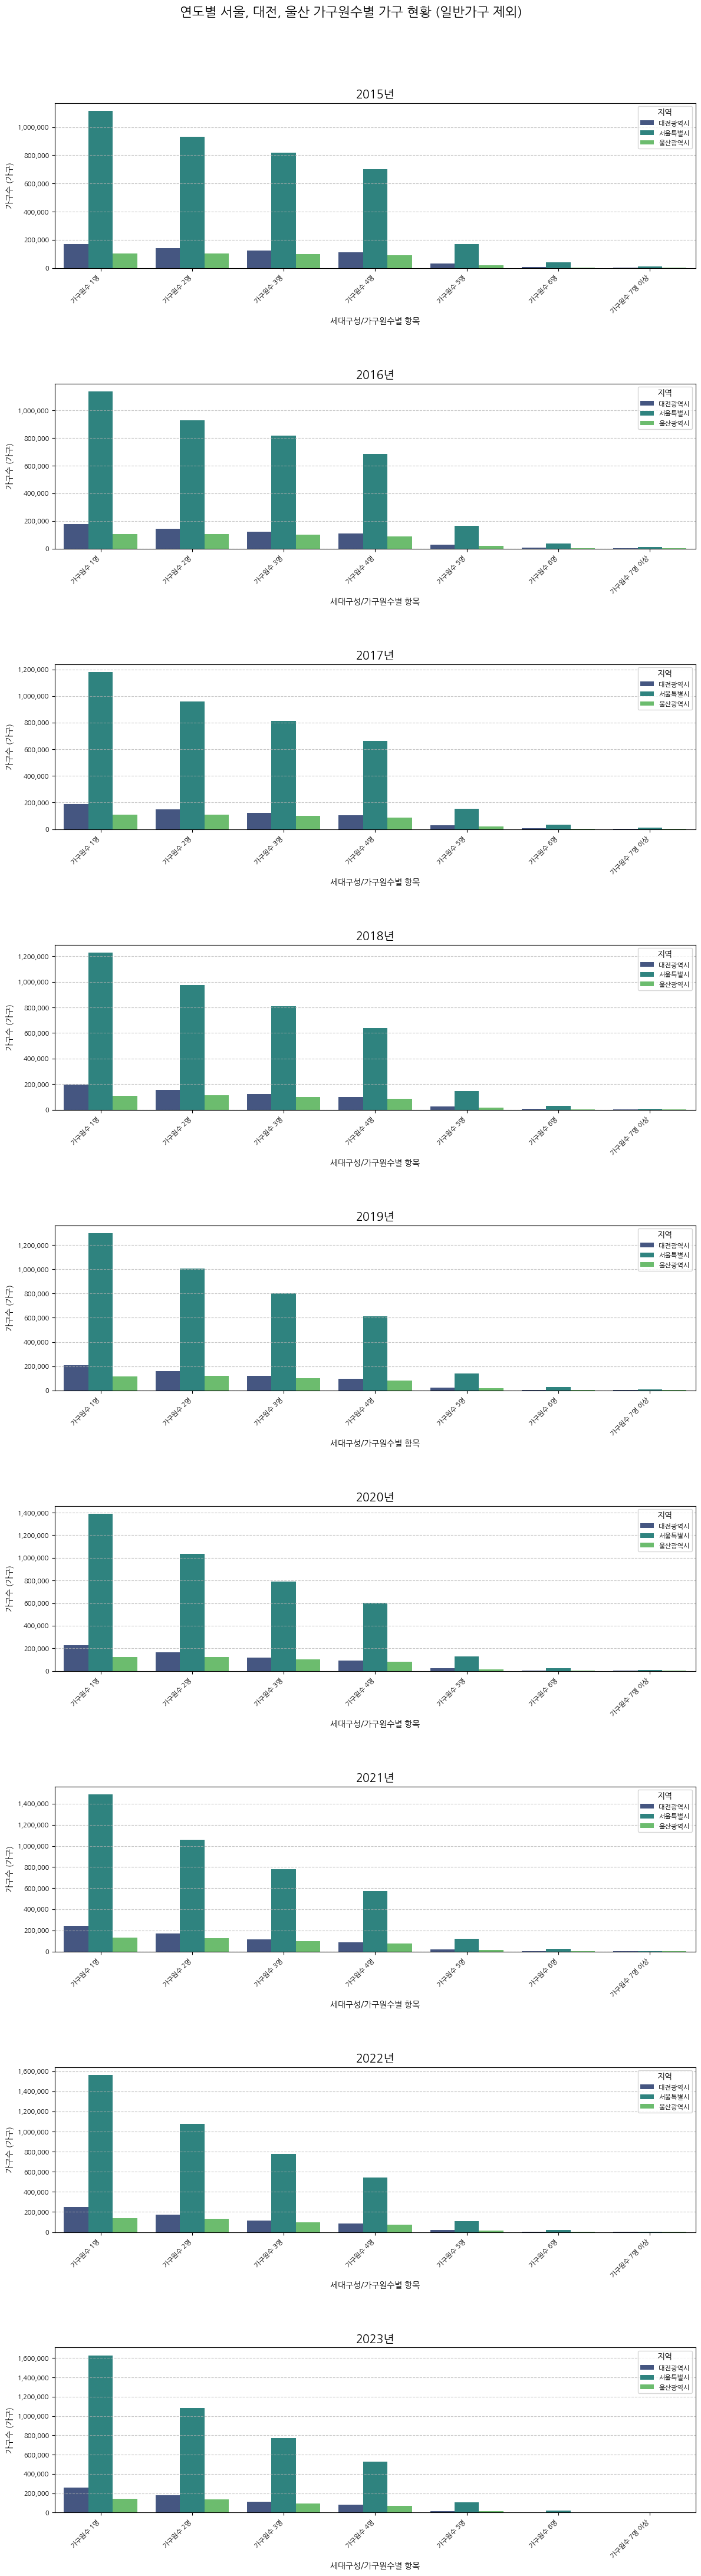

In [61]:
## 연도별 가구 구성 시각화를 위한 데이터 전처리

household_cols_to_select = [
    '지역', '연도',
    '계_일반가구',
    '계_가구원수 1명',
    '계_가구원수 2명',
    '계_가구원수 3명',
    '계_가구원수 4명',
    '계_가구원수 5명',
    '계_가구원수 6명',
    '계_가구원수 7명 이상'
]

# final_merged_df_filtered에 해당 컬럼이 있는지 확인 후 선택
available_household_cols = [col for col in household_cols_to_select if col in final_merged_df_filtered.columns]
if not available_household_cols:
    print("경고: 가구 구성 시각화에 필요한 컬럼을 final_merged_df_filtered에서 찾을 수 없습니다.")

else:
    regional_household_df_raw = final_merged_df_filtered[final_merged_df_filtered['지역'].isin(['서울특별시', '대전광역시', '울산광역시'])].copy()
    regional_household_df_raw = regional_household_df_raw[available_household_cols].copy()

    household_value_vars = [col for col in available_household_cols if col not in ['지역', '연도']]

    regional_household_melted_df_sorted = regional_household_df_raw.melt(
        id_vars=['지역', '연도'],
        value_vars=household_value_vars,
        var_name='가구구성',
        value_name='가구수'
    )

    # '가구구성' 컬럼의 이름들을 간소화
    regional_household_melted_df_sorted['가구구성'] = regional_household_melted_df_sorted['가구구성'].str.replace('계_', '', regex=False)

    # '가구수' 컬럼을 숫자형으로 변환
    regional_household_melted_df_sorted['가구수'] = pd.to_numeric(regional_household_melted_df_sorted['가구수'], errors='coerce').fillna(0).astype(int)


    # 플롯 구성을 위해 가구 구성 세부 항목 순서 정렬 (일반가구 제외)
    household_detail_order_for_plot = ['가구원수 1명', '가구원수 2명', '가구원수 3명', '가구원수 4명', '가구원수 5명', '가구원수 6명', '가구원수 7명 이상']

    # '가구구성' 컬럼을 범주형으로 정렬하기 (일반가구 제외된 순서 사용)
    regional_household_melted_df_sorted['가구구성'] = pd.Categorical(
        regional_household_melted_df_sorted['가구구성'],
        categories=household_detail_order_for_plot,
        ordered=True
    )

    # '일반가구' 항목을 제외한 데이터 필터링 (시각화에 사용할 최종 데이터)
    data_for_plot = regional_household_melted_df_sorted[
        regional_household_melted_df_sorted['가구구성'] != '일반가구'
    ].copy()


    print("\n연도별 가구 구성 시각화 데이터 준비 완료 (일반가구 제외):")
    print(data_for_plot.head())
    print(data_for_plot.info())

    ## 연도별 가구 구성 시각화

    # 고유 연도 목록 가져오기
    years = data_for_plot['연도'].unique()
    n_years = len(years)

    # figure 및 axes 생성 (세로로 나열)
    fig, axes = plt.subplots(nrows=n_years, ncols=1, figsize=(12, 5 * n_years), sharey=False)

    # 축이 1차원 배열이 아닐 경우 평탄화하기
    if n_years == 1:
        axes = [axes]
    axes = axes.flatten()


    # 각 연도별로 서브플롯에 바 플롯 그리기
    for i, year in enumerate(years):
        ax = axes[i]

        # 해당 연도의 데이터 필터링
        data_year = data_for_plot[data_for_plot['연도'] == year].copy()

        # 바 플롯 생성
        sns.barplot(data=data_year,
                    x='가구구성',
                    y='가구수',
                    hue='지역',
                    palette='viridis',
                    errorbar=None,
                    ax=ax)

        # 그래프 제목 및 축 라벨 설정
        ax.set_title(f'{year}년', fontsize=14)
        ax.set_xlabel("세대구성/가구원수별 항목", fontsize=10)
        ax.set_ylabel("가구수 (가구)", fontsize=10)

        # 가독성을 위해 x축 라벨 회전
        current_ticks = ax.get_xticks()
        current_labels = ax.get_xticklabels()
        ax.set_xticks(current_ticks)
        ax.set_xticklabels(current_labels, rotation=45, ha='right', fontsize=8)

        ax.tick_params(axis='y', labelsize=8)

        # Y축 라벨 형식 설정
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

        # 그리드 표시
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        # 범례 추가
        ax.legend(title='지역', fontsize=8)


    # 전체 Figure 제목 설정
    fig.suptitle('연도별 서울, 대전, 울산 가구원수별 가구 현황 (일반가구 제외)', y=1.00, fontsize=16)

    # 서브플롯 간 간격 조정
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.subplots_adjust(hspace=0.7)

    # 시각화 결과 저장
    plt.savefig("all_regions_household.png", dpi=300, bbox_inches="tight")

    plt.show()

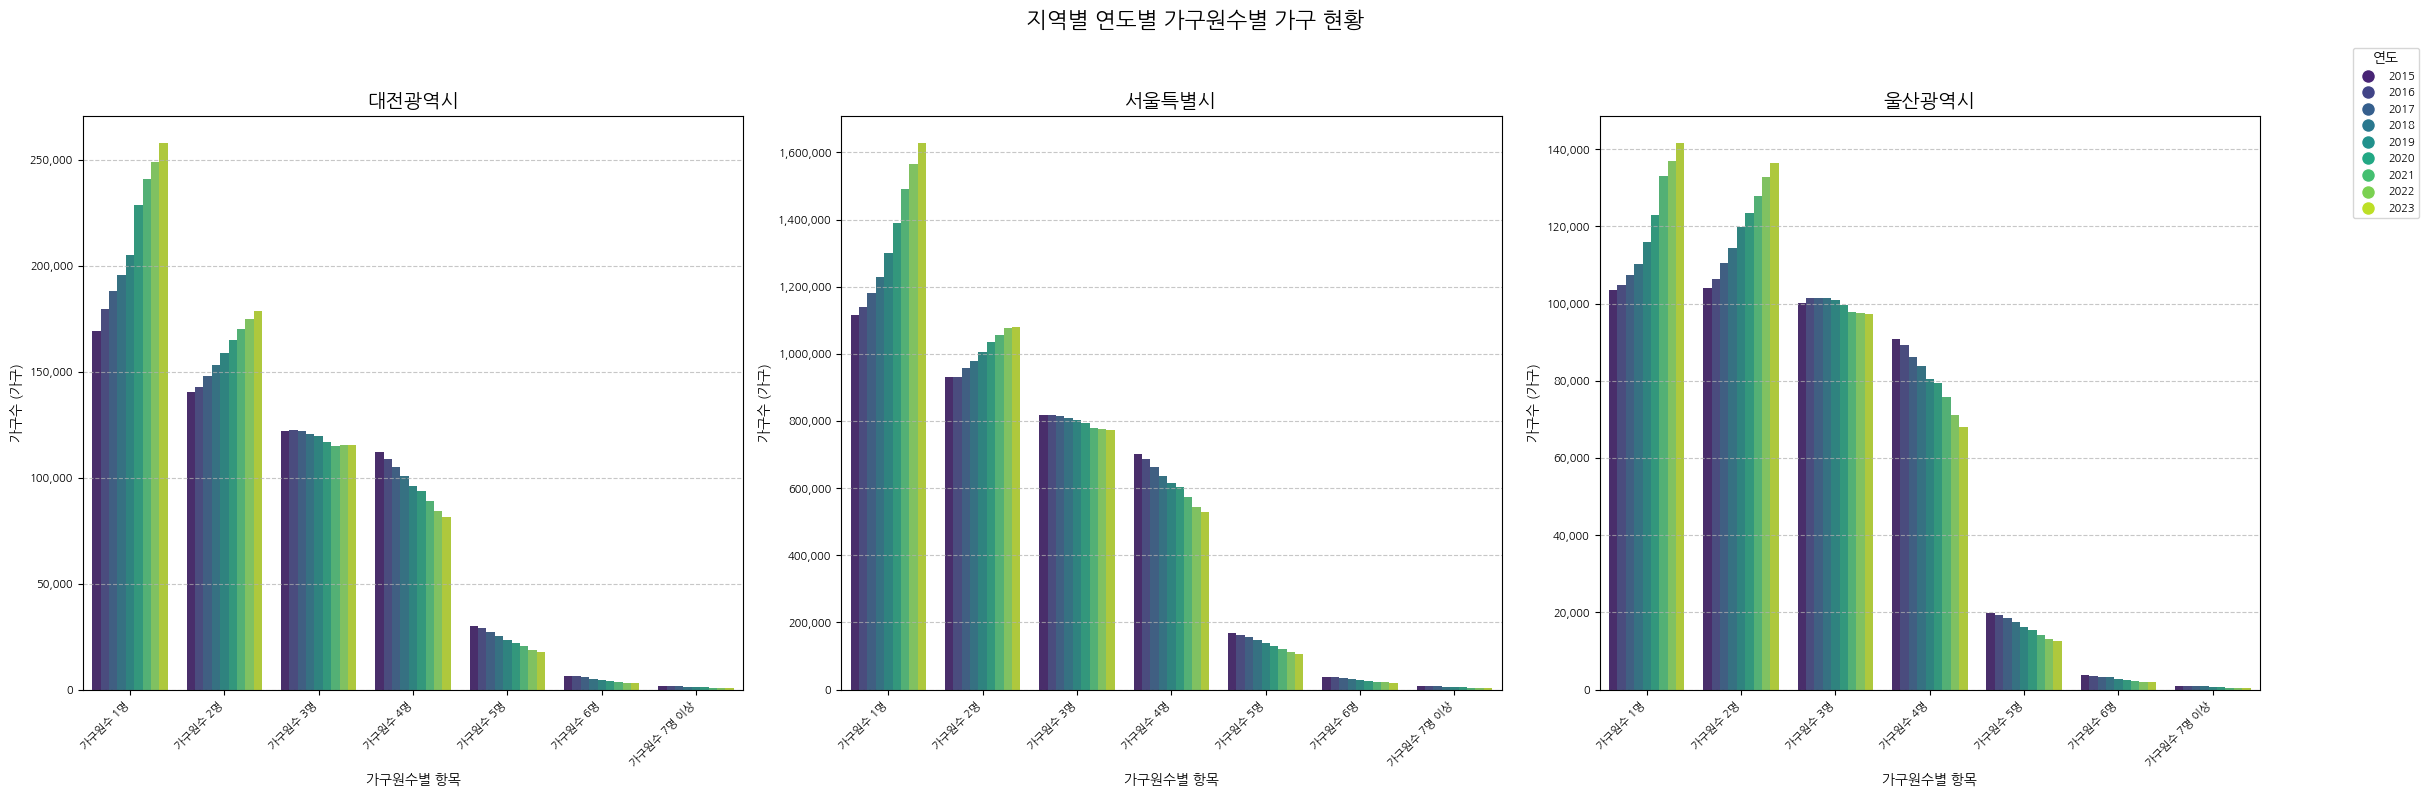

In [62]:
## 연도별 및 가구원수별 가구 현황 시각화

# 서울, 대전, 울산 지역 필터링
regional_household_df = final_merged_df_filtered[final_merged_df_filtered['지역'].isin(['서울특별시', '대전광역시', '울산광역시'])].copy()

# 필요한 가구 구성 관련 컬럼 목록
household_cols_to_select = [
    '지역', '연도',
    '계_일반가구',
    '계_가구원수 1명',
    '계_가구원수 2명',
    '계_가구원수 3명',
    '계_가구원수 4명',
    '계_가구원수 5명',
    '계_가구원수 6명',
    '계_가구원수 7명 이상'
]

# 선택한 컬럼들만 포함하는 데이터프레임 생성
available_household_cols = [col for col in household_cols_to_select if col in regional_household_df.columns]
regional_household_filtered_df = regional_household_df[available_household_cols].copy()

# 데이터를 시각화에 적합한 'Long' 형식으로 변환 (melt)
household_value_vars = [col for col in available_household_cols if col not in ['지역', '연도']]

regional_household_melted_df = regional_household_filtered_df.melt(
    id_vars=['지역', '연도'],
    value_vars=household_value_vars,
    var_name='가구구성',
    value_name='가구수'
)

# '가구구성' 컬럼의 이름들을 간소화
regional_household_melted_df['가구구성'] = regional_household_melted_df['가구구성'].str.replace('계_', '', regex=False)

# '가구수' 컬럼을 숫자형으로 변환
regional_household_melted_df['가구수'] = pd.to_numeric(regional_household_melted_df['가구수'], errors='coerce').fillna(0).astype(int)

# 플롯 구성을 위해 가구 구성 세부 항목 순서 정렬
household_detail_order_filtered = ['가구원수 1명', '가구원수 2명', '가구원수 3명', '가구원수 4명', '가구원수 5명', '가구원수 6명', '가구원수 7명 이상']

# '가구구성' 컬럼을 범주형으로 정렬하기
regional_household_melted_df['가구구성'] = pd.Categorical(
    regional_household_melted_df['가구구성'],
    categories=household_detail_order_filtered,
    ordered=True
)

# '일반가구' 항목을 제외한 데이터 필터링 (최종 시각화 데이터)
regional_household_melted_filtered_for_plot = regional_household_melted_df[
    regional_household_melted_df['가구구성'] != '일반가구'
].copy()


## 시각화 시작
# 고유 지역 목록 가져오기
regions = regional_household_melted_filtered_for_plot['지역'].unique()
n_regions = len(regions)

# figure 및 axes 생성 (가로 나열)
fig, axes = plt.subplots(nrows=1, ncols=n_regions, figsize=(8 * n_regions, 8), sharey=False)

# 축이 1차원 배열이 아닐 경우 리스트로 변환
if n_regions == 1:
    axes = [axes]

# 모든 연도를 가져와 범례에 일관적으로 사용하기 위한 준비
all_years_for_legend = sorted(regional_household_melted_filtered_for_plot['연도'].unique())

# 모든 연도에 대한 색상 추출
palette_colors = sns.color_palette('viridis', n_colors=len(all_years_for_legend))
year_color_map = {year: color for year, color in zip(all_years_for_legend, palette_colors)}


# 각 지역별로 서브플롯에 바 플롯 그리기
for i, region in enumerate(regions):
    ax = axes[i]

    # 해당 지역 데이터 필터링
    data_region = regional_household_melted_filtered_for_plot[regional_household_melted_filtered_for_plot['지역'] == region].copy()

    # 바 플롯 생성
    sns.barplot(data=data_region,
                x='가구구성',
                y='가구수',
                hue='연도',
                palette=year_color_map,
                errorbar=None,
                ax=ax)

    # 그래프 제목 및 축 라벨 설정
    ax.set_title(f'{region}', fontsize=14)
    ax.set_xlabel("가구원수별 항목", fontsize=10)
    ax.set_ylabel("가구수 (가구)", fontsize=10)

    # x축 라벨 회전
    current_ticks = ax.get_xticks()
    current_labels = ax.get_xticklabels()
    ax.set_xticks(current_ticks)
    ax.set_xticklabels(current_labels, rotation=45, ha='right', fontsize=8)

    ax.tick_params(axis='y', labelsize=8)

    # Y축 라벨 형식 설정
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    # 그리드 표시
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # 각 서브플롯의 개별 범례는 제거
    ax.get_legend().remove()


# 전체 figure 제목 설정
fig.suptitle('지역별 연도별 가구원수별 가구 현황', y=1.02, fontsize=16)

# 전체 figure에 대한 단일 범례 생성
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=str(year),
                              markerfacecolor=year_color_map[year], markersize=10)
                   for year in all_years_for_legend]

fig.legend(handles=legend_elements, title='연도', fontsize=8,
           bbox_to_anchor=(0.98, 0.98), loc='upper left', ncol=1)

# 서브플롯 간 간격 조정
plt.tight_layout(rect=[0, 0.03, 0.95, 0.98])

# 시각화 결과 저장
plt.savefig("all_regions_household_change.png", dpi=300, bbox_inches="tight")

plt.show()

## 인구 밀도 데이터 시각화
- 서울, 대전, 울산 지역의 연도별 인구 밀도 변화를 시각화


In [63]:
## 인구 밀도 시각화를 위한 데이터 전처리

# 파일 경로 설정
pop_dens_2015_2020_path = '/content/drive/MyDrive/Colab Notebooks/데이터/인구 밀도(2015~2020년).csv'

# 파일 로드 및 변환
try:
    pop_dens_2015_2020_df_from_csv_wide = pd.read_csv(pop_dens_2015_2020_path, encoding='cp949')
    print("2015-2020년 인구 밀도 데이터 로드 완료")

    # 로드된 데이터프레임의 컬럼 이름 출력
    print("\n로드된 데이터프레임의 컬럼 목록:")
    display(pop_dens_2015_2020_df_from_csv_wide.columns)

    # long 형식으로 melt
    years_cols = [str(year) for year in range(2015, 2021)]
    if '행정구역별' in pop_dens_2015_2020_df_from_csv_wide.columns and all(col in pop_dens_2015_2020_df_from_csv_wide.columns for col in years_cols):
        pop_dens_2015_2020_df_from_csv_long = pop_dens_2015_2020_df_from_csv_wide.melt(
            id_vars=['행정구역별'],
            value_vars=years_cols,
            var_name='연도',
            value_name='인구밀도'
        )

        # '행정구역별'을 '지역'으로 이름 변경
        pop_dens_2015_2020_df_from_csv_long.rename(columns={'행정구역별': '지역'}, inplace=True)

        pop_dens_2015_2020_df_from_csv_long['연도'] = pd.to_numeric(pop_dens_2015_2020_df_from_csv_long['연도'], errors='coerce').astype(int)

        print("2015-2020년 인구 밀도 데이터 변환 완료")
        pop_dens_2015_2020_df = pop_dens_2015_2020_df_from_csv_long.copy()

    else:
        print("변환 실패")
        pop_dens_2015_2020_df = pd.DataFrame(columns=['지역', '연도', '인구밀도'])


except FileNotFoundError:
    print(f"오류: '{pop_dens_2015_2020_path}'2015-2020년 데이터 로드 실패")
    pop_dens_2015_2020_df = pd.DataFrame(columns=['지역', '연도', '인구밀도'])
except Exception as e:
    print(f"2015-2020년 인구 밀도 데이터 로드 및 변환 중 오류 발생: {e}")
    pop_dens_2015_2020_df = pd.DataFrame(columns=['지역', '연도', '인구밀도'])


## final_merged_df_filtered에서 모든 인구 밀도 데이터 추출
# 병합된 데이터프레임에서 관련 컬럼 선택
final_merged_df_filtered['연도'] = pd.to_numeric(final_merged_df_filtered['연도'], errors='coerce')
pop_dens_from_merged_df = final_merged_df_filtered[['지역', '연도', '인구밀도']].copy()

# 결측치 행 제거
pop_dens_from_merged_df.dropna(subset=['인구밀도'], inplace=True)
pop_dens_from_merged_df['연도'] = pop_dens_from_merged_df['연도'].astype(int)
print("final_merged_df_filtered에서 인구 밀도 데이터 추출 및 결측치 제거 완료")


## merged_df와 데이터 병합
# 데이터프레임 연결
combined_pop_dens_initial_df = pd.concat([pop_dens_2015_2020_df, pop_dens_from_merged_df], ignore_index=True)
print("초기 데이터 병합 완료")

# 중복 제거
combined_pop_dens_df = combined_pop_dens_initial_df.drop_duplicates(subset=['지역', '연도'], keep='first').copy()
print("중복 행 제거 완료")


# 서울, 대전, 울산 지역 필터링
regional_pop_dens_df = combined_pop_dens_df[
    combined_pop_dens_df['지역'].isin(['서울특별시', '대전광역시', '울산광역시'])
].copy()

regional_pop_dens_df['인구밀도'] = pd.to_numeric(regional_pop_dens_df['인구밀도'], errors='coerce')

# 결측치 행 제거
regional_pop_dens_df.dropna(subset=['인구밀도'], inplace=True)

# 데이터 정렬
regional_pop_dens_df = regional_pop_dens_df.sort_values(by=['지역', '연도']).copy()

print("\n지역별 인구 밀도 시각화를 위해 준비된 최종 데이터:")
display(regional_pop_dens_df.head())
display(regional_pop_dens_df.tail())

# 데이터프레임 확인
regional_pop_dens_df.info()
display(regional_pop_dens_df['연도'].unique())

2015-2020년 인구 밀도 데이터 로드 완료

로드된 데이터프레임의 컬럼 목록:


Index(['행정구역별', '2015', '2016', '2017', '2018', '2019', '2020'], dtype='object')

2015-2020년 인구 밀도 데이터 변환 완료
final_merged_df_filtered에서 인구 밀도 데이터 추출 및 결측치 제거 완료
초기 데이터 병합 완료
중복 행 제거 완료

지역별 인구 밀도 시각화를 위해 준비된 최종 데이터:


,지역,연도,인구밀도
1,대전광역시,2015,2852.3
4,대전광역시,2016,2846.9
7,대전광역시,2017,2828.5
10,대전광역시,2018,2801.0
13,대전광역시,2019,2777.5


,지역,연도,인구밀도
14,울산광역시,2019,1076.9
17,울산광역시,2020,1069.0
378,울산광역시,2021,1055.0
379,울산광역시,2022,1044.9
380,울산광역시,2023,1042.0


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1 to 380
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      27 non-null     object 
 1   연도      27 non-null     int64  
 2   인구밀도    27 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 864.0+ bytes


array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

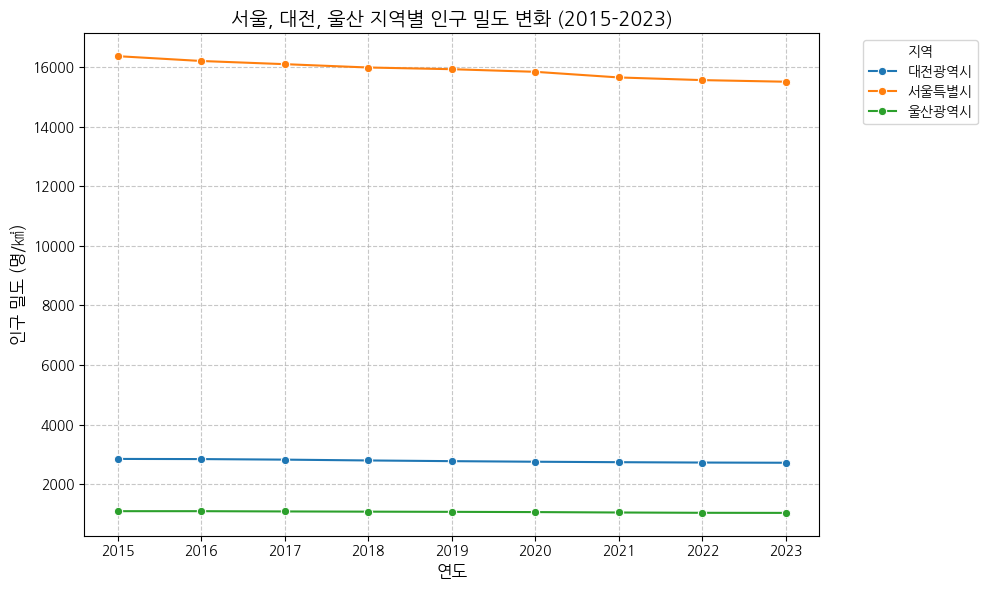

In [64]:
## 인구 밀도 시각화

# 지역 및 연도별 인구 밀도 변화 추이 시각화를 위한 꺾은 선 그래프 생성
plt.figure(figsize=(10, 6))

sns.lineplot(data=regional_pop_dens_df,
             x='연도',
             y='인구밀도',
             hue='지역',
             marker='o')

# 그래프 및 라벨 제목 설정
plt.title('서울, 대전, 울산 지역별 인구 밀도 변화 (2015-2023)', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('인구 밀도 (명/㎢)', fontsize=12)  # 인구 밀도 단위로 제곱킬로미터 사용
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# 범주 위치 설정
plt.legend(title='지역', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# 시각화 결과 저장
plt.savefig("all_regions_pop_density_change.png", dpi=300, bbox_inches="tight")

plt.show()

## 산업별 종사자 수 데이터 시각화
* 서울, 대전, 울산 지역의 연도별 주요 산업별 종사자 수 데이터를 시각화


In [65]:
# 컬럼명 확인
final_merged_df_filtered.columns

Index(['지역', '연령별', '총인구_남자(명)', '연도', '총인구_여자(명)', '총인구(명)', '1세대 가구_가구원수 1명',
       '1세대 가구_가구원수 2명', '1세대 가구_가구원수 3명', '1세대 가구_가구원수 4명', '1세대 가구_가구원수 5명',
       '1세대 가구_가구원수 6명', '1세대 가구_가구원수 7명 이상', '1세대 가구_일반가구', '1인 가구_가구원수 1명',
       '1인 가구_가구원수 2명', '1인 가구_가구원수 3명', '1인 가구_가구원수 4명', '1인 가구_가구원수 5명',
       '1인 가구_가구원수 6명', '1인 가구_가구원수 7명 이상', '1인 가구_일반가구', '2세대 가구_가구원수 1명',
       '2세대 가구_가구원수 2명', '2세대 가구_가구원수 3명', '2세대 가구_가구원수 4명', '2세대 가구_가구원수 5명',
       '2세대 가구_가구원수 6명', '2세대 가구_가구원수 7명 이상', '2세대 가구_일반가구', '3세대 가구_가구원수 1명',
       '3세대 가구_가구원수 2명', '3세대 가구_가구원수 3명', '3세대 가구_가구원수 4명', '3세대 가구_가구원수 5명',
       '3세대 가구_가구원수 6명', '3세대 가구_가구원수 7명 이상', '3세대 가구_일반가구',
       '4세대 이상 가구_가구원수 1명', '4세대 이상 가구_가구원수 2명', '4세대 이상 가구_가구원수 3명',
       '4세대 이상 가구_가구원수 4명', '4세대 이상 가구_가구원수 5명', '4세대 이상 가구_가구원수 6명',
       '4세대 이상 가구_가구원수 7명 이상', '4세대 이상 가구_일반가구', '계_가구원수 1명', '계_가구원수 2명',
       '계_가구원수 3명', '계_가구원수 4명', '계_가구원수 5명', '계_가구원수 6명', '계_가구원수 7명 이상',
       '계_일반가구', '인구밀도',

In [66]:
print(final_merged_df_filtered[['지역', '연도', '건설업_계']].head())
print(final_merged_df_filtered[['지역', '연도', '건설업_계']].info())

      지역    연도  건설업_계
0  대전광역시  2015    NaN
1  대전광역시  2016    NaN
2  대전광역시  2017    NaN
3  대전광역시  2018    NaN
4  대전광역시  2019    NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      540 non-null    object 
 1   연도      540 non-null    int64  
 2   건설업_계   0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.8+ KB
None


      지역   연령별  총인구_남자(명)    연도  총인구_여자(명)  총인구(명)  1세대 가구_가구원수 1명  \
0  대전광역시  0~4세      36522  2015      34480   71002               0   
1  대전광역시  0~4세      35442  2016      33181   68623               0   
2  대전광역시  0~4세      33069  2017      31165   64234               0   
3  대전광역시  0~4세      30594  2018      28802   59396               0   
4  대전광역시  0~4세      28033  2019      26483   54516               0   

   1세대 가구_가구원수 2명  1세대 가구_가구원수 3명  1세대 가구_가구원수 4명  ...  정보통신업_전규모  제조업_계  \
0           89802            2392             146  ...        NaN    NaN   
1           89843            2170             114  ...        NaN    NaN   
2           93748            2201             126  ...        NaN    NaN   
3           97402            2227             140  ...        NaN    NaN   
4          101719            2239             144  ...        NaN    NaN   

   제조업_전규모  협회 및 단체, 수리 및 기타 개인 서비스업_계  협회 및 단체, 수리 및 기타 개인 서비스업_전규모  사망자수(명)  \
0      NaN                         NaN   

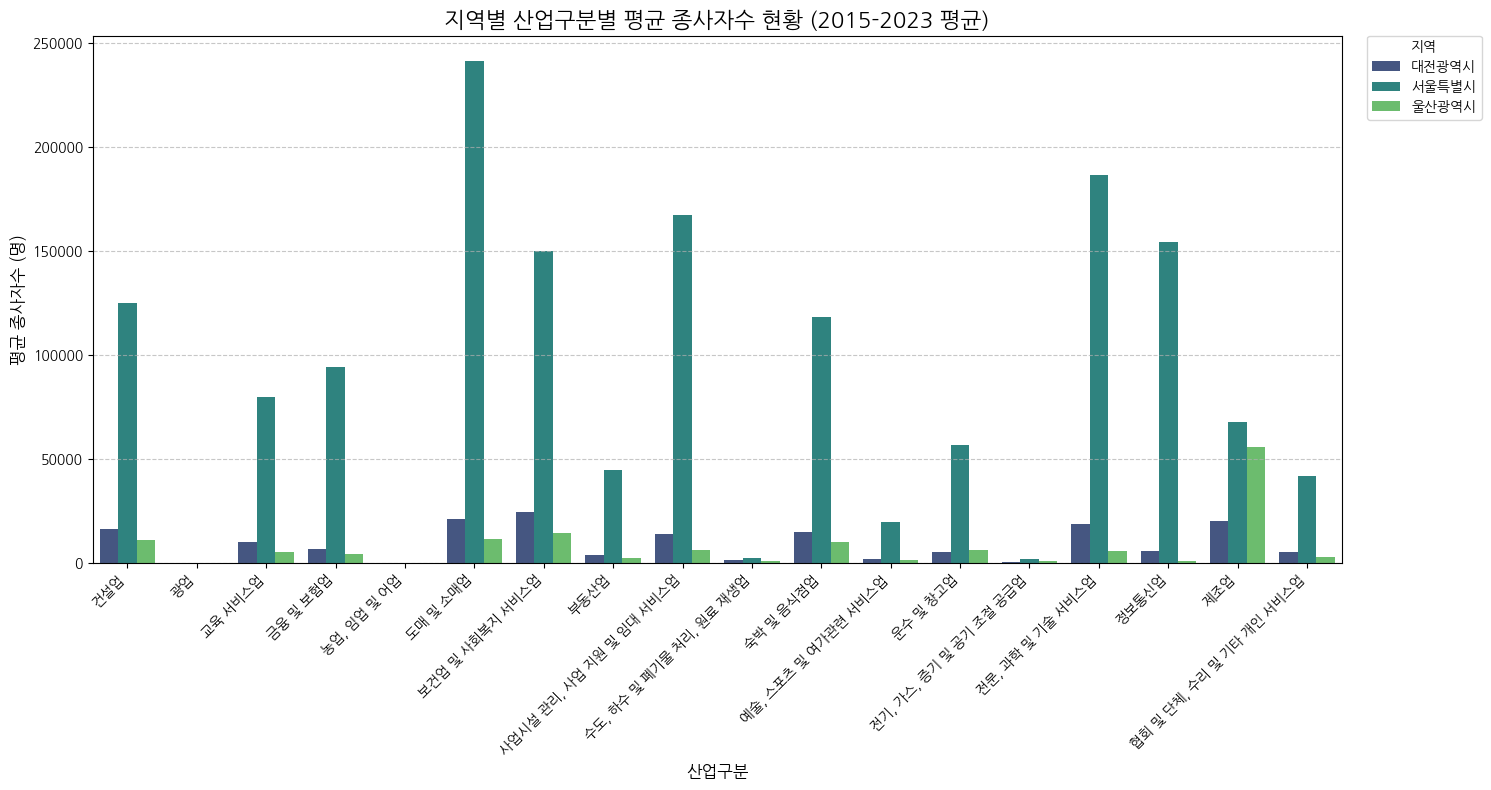

In [67]:
# 지역 필터링
industry_df_temp = final_merged_df_filtered.copy()

# 서울, 대전, 울산 지역 선택
industry_df_regions = industry_df_temp[
    industry_df_temp['지역'].isin(['서울특별시', '대전광역시', '울산광역시'])
].copy()

# 필터링된 데이터프레임 확인
print(industry_df_regions.head())


# '종사자수' 관련 컬럼 확인
employee_count_cols = []

# 모든 컬럼을 반복하여 관련 산업 컬럼 확인
for col in industry_df_regions.columns:
    # 비-산업 관련 컬럼 제외
    if '총인구' in col or '가구원수' in col or '일반가구' in col or '사망자수' in col or '이혼건수' in col or '출생아수' in col or '합계출산율' in col or '혼인건수' in col or '인구밀도' in col:
        continue  # 해당 컬럼들은 건너뜀

    # '_전규모'로 끝나고 '전체'를 포함하지 않는 컬럼을 종사자수 컬럼으로 사용
    if col.endswith('_전규모') and '전체' not in col:
        employee_count_cols.append(col)

# melt 후에도 유지될 ID 컬럼 정의
id_columns = ['지역', '연도']

# 종사자수 데이터 Long 형식으로 변환 (melt)
industry_employee_df = pd.DataFrame()
if employee_count_cols:
    industry_employee_df = pd.melt(
        industry_df_regions,
        id_vars=id_columns,
        value_vars=employee_count_cols,
        var_name='산업구분_원문',
        value_name='종사자수'
    )
    # 실제 산업명 추출
    industry_employee_df['산업구분'] = industry_employee_df['산업구분_원문'].apply(lambda x: x.replace('_전규모', ''))
    industry_employee_df.drop(columns=['산업구분_원문'], inplace=True)
    industry_employee_df['종사자수'] = pd.to_numeric(industry_employee_df['종사자수'], errors='coerce').fillna(0).astype(int)

    # 총계 데이터를 산업구분에서 제외
    industry_employee_df = industry_employee_df[
        ~industry_employee_df['산업구분'].isin(['전체 산업', '전체', '계', '총계'])
    ].copy()

    # 변환된 종사자수 데이터프레임 확인
    print(industry_employee_df.head())
    print(industry_employee_df.info())
else:
    print("\n종사자수 관련 컬럼이 없어 데이터프레임 생성 실패")


# 시각화 전 설정
if not industry_employee_df.empty:
    # 연도별 평균 종사자수 집계
    industry_employee_avg_df = industry_employee_df.groupby(['지역', '산업구분'])['종사자수'].mean().reset_index()
    industry_employee_avg_df.rename(columns={'종사자수': '평균_종사자수'}, inplace=True)

    # 연도별 평균 종사자수 데이터프레임 확인
    print(industry_employee_avg_df.head())
    print(industry_employee_avg_df.info())

    # 단일 서브플롯에 지역별 평균 종사자수 시각화
    region_palette = sns.color_palette('viridis', n_colors=len(industry_employee_avg_df['지역'].unique()))

    plt.figure(figsize=(15, 8))
    ax = sns.barplot(data=industry_employee_avg_df,
                    x='산업구분', y='평균_종사자수',
                    hue='지역',
                    palette=region_palette,
                    errorbar=None,
                    dodge=True,
                    width=0.8)

    plt.title('지역별 산업구분별 평균 종사자수 현황 (2015-2023 평균)', fontsize=16)
    plt.xlabel('산업구분', fontsize=12)
    plt.ylabel('평균 종사자수 (명)', fontsize=12)

    # X축 라벨 회전 및 정렬
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Y축 그리드만 표시

    # 범례 위치 조정
    plt.legend(title='지역', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

    plt.tight_layout()

    # 시각화 결과 저장
    plt.savefig("all_regions_industry_job.png", dpi=300, bbox_inches="tight")
    plt.show()

else:
    print("\n시각화할 산업 종사자수 데이터가 없습니다.")

## 인구 동향 데이터 시각화
* 서울, 대전, 울산 지역의 연도별 출생아수, 사망자수, 혼인/이혼 건수, 합계출산율 등 인구 동향 데이터를 시각화


In [68]:
final_merged_df_filtered.columns

Index(['지역', '연령별', '총인구_남자(명)', '연도', '총인구_여자(명)', '총인구(명)', '1세대 가구_가구원수 1명',
       '1세대 가구_가구원수 2명', '1세대 가구_가구원수 3명', '1세대 가구_가구원수 4명', '1세대 가구_가구원수 5명',
       '1세대 가구_가구원수 6명', '1세대 가구_가구원수 7명 이상', '1세대 가구_일반가구', '1인 가구_가구원수 1명',
       '1인 가구_가구원수 2명', '1인 가구_가구원수 3명', '1인 가구_가구원수 4명', '1인 가구_가구원수 5명',
       '1인 가구_가구원수 6명', '1인 가구_가구원수 7명 이상', '1인 가구_일반가구', '2세대 가구_가구원수 1명',
       '2세대 가구_가구원수 2명', '2세대 가구_가구원수 3명', '2세대 가구_가구원수 4명', '2세대 가구_가구원수 5명',
       '2세대 가구_가구원수 6명', '2세대 가구_가구원수 7명 이상', '2세대 가구_일반가구', '3세대 가구_가구원수 1명',
       '3세대 가구_가구원수 2명', '3세대 가구_가구원수 3명', '3세대 가구_가구원수 4명', '3세대 가구_가구원수 5명',
       '3세대 가구_가구원수 6명', '3세대 가구_가구원수 7명 이상', '3세대 가구_일반가구',
       '4세대 이상 가구_가구원수 1명', '4세대 이상 가구_가구원수 2명', '4세대 이상 가구_가구원수 3명',
       '4세대 이상 가구_가구원수 4명', '4세대 이상 가구_가구원수 5명', '4세대 이상 가구_가구원수 6명',
       '4세대 이상 가구_가구원수 7명 이상', '4세대 이상 가구_일반가구', '계_가구원수 1명', '계_가구원수 2명',
       '계_가구원수 3명', '계_가구원수 4명', '계_가구원수 5명', '계_가구원수 6명', '계_가구원수 7명 이상',
       '계_일반가구', '인구밀도',


[DEBUG] Checking presence of individual population trend columns:
  '출생아수(명)' in final_merged_df_filtered.columns: True
  '사망자수(명)' in final_merged_df_filtered.columns: True
  '혼인건수(건)' in final_merged_df_filtered.columns: True
  '이혼건수(건)' in final_merged_df_filtered.columns: True
  '합계출산율' in final_merged_df_filtered.columns: True
------------------------------------------------------------
지역별 인구 동향 시각화를 위해 준비된 데이터:
        지역    연도  세부항목_동향   인구동향값
540  대전광역시  2015  사망자수(명)  6961.0
546  대전광역시  2015  사망자수(명)  6961.0
552  대전광역시  2015  사망자수(명)  6961.0
558  대전광역시  2015  사망자수(명)  6961.0
564  대전광역시  2015  사망자수(명)  6961.0
         지역    연도  세부항목_동향   인구동향값
1607  울산광역시  2023  혼인건수(건)  4274.0
1610  울산광역시  2023  혼인건수(건)  4274.0
1613  울산광역시  2023  혼인건수(건)  4274.0
1616  울산광역시  2023  혼인건수(건)  4274.0
1619  울산광역시  2023  혼인건수(건)  4274.0
<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, 540 to 1619
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------

/tmp/ipython-input-3260877598.py:128: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(x_labels, rotation=45, ha='right', fontsize=8)
/tmp/ipython-input-3260877598.py:128: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(x_labels, rotation=45, ha='right', fontsize=8)
/tmp/ipython-input-3260877598.py:128: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(x_labels, rotation=45, ha='right', fontsize=8)


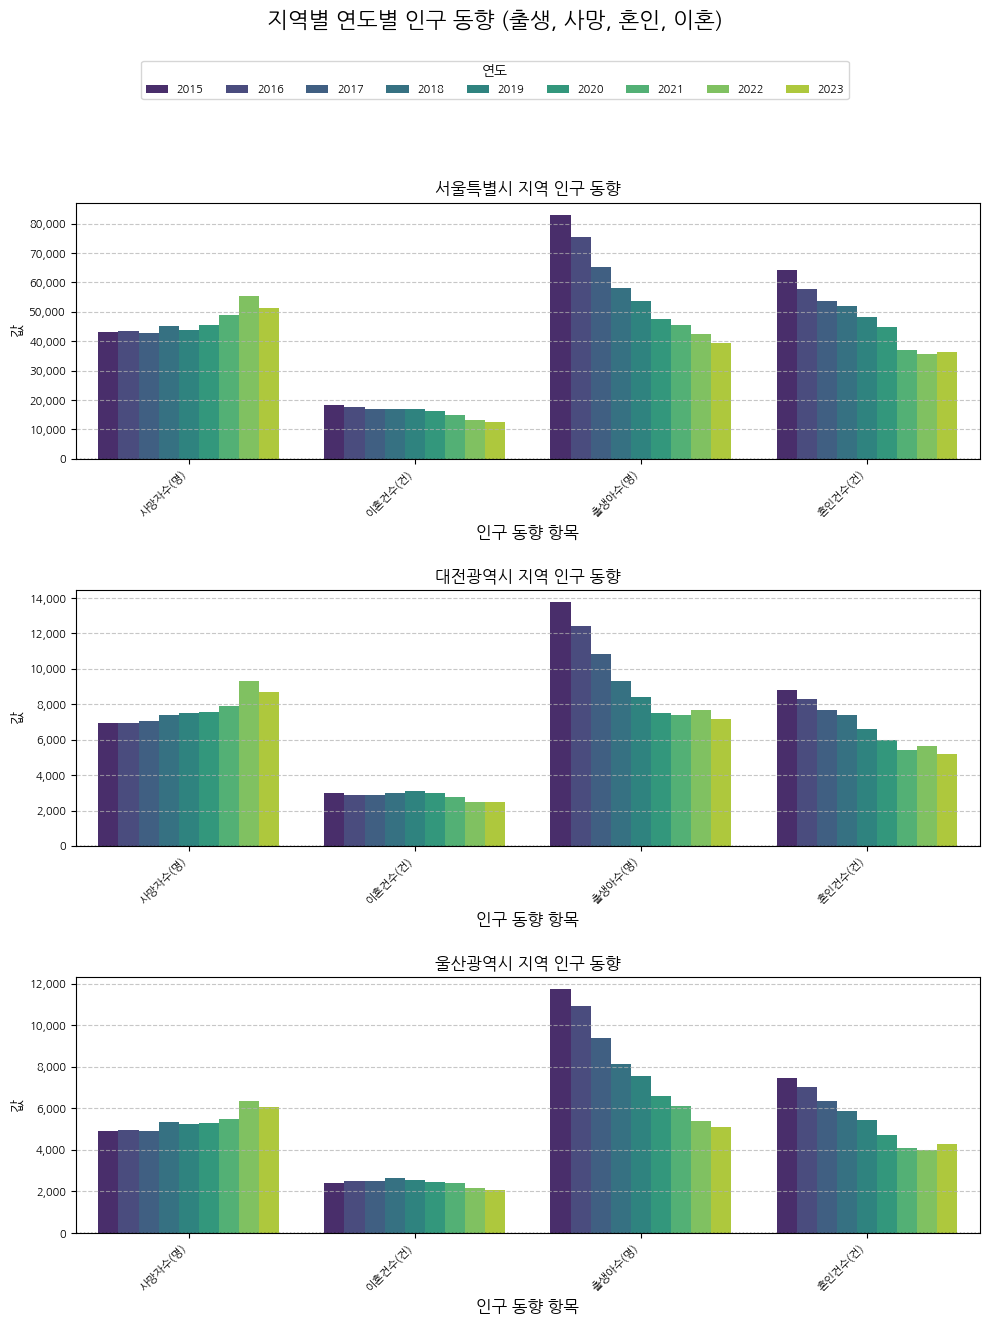

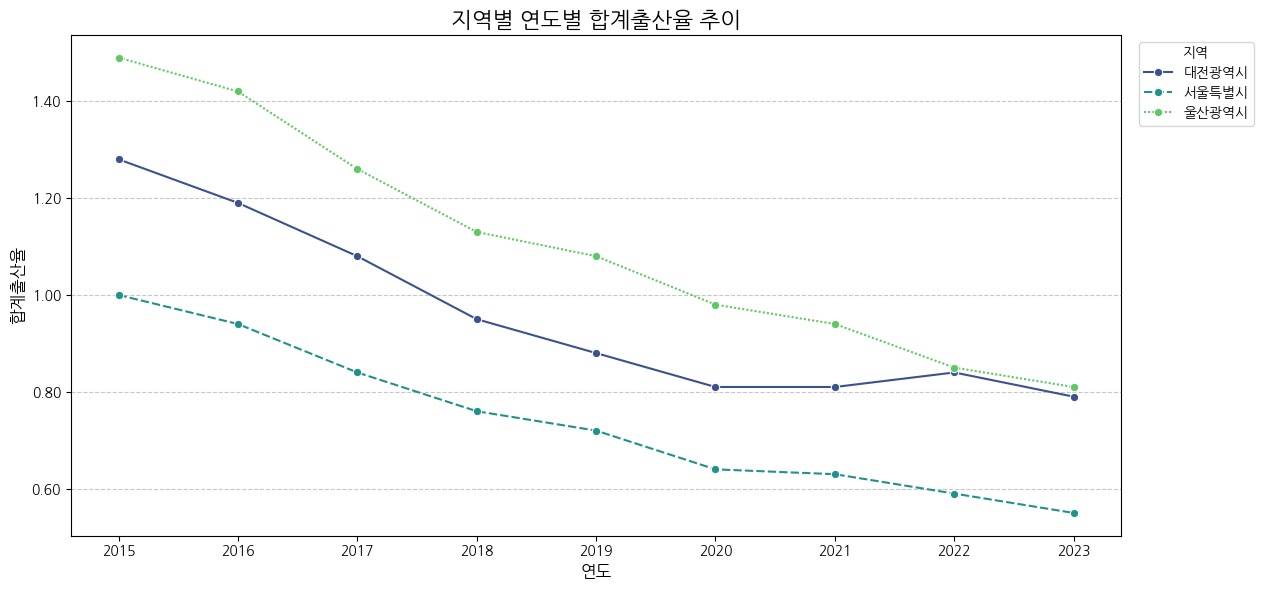

In [69]:
## 인구동향 데이터 시각화

# 인구 동향 관련 컬럼 정의
pop_trend_value_cols = ['출생아수(명)', '사망자수(명)', '혼인건수(건)', '이혼건수(건)', '합계출산율']

# 필요 컬럼 확인
print("\n[DEBUG] Checking presence of individual population trend columns:")
for col in pop_trend_value_cols:
    print(f"  '{col}' in final_merged_df_filtered.columns: {col in final_merged_df_filtered.columns}")
print("-" * 60)


# final_merged_df_filtered에 필요한 컬럼이 모두 있는지 확인
required_pop_trend_cols = ['지역', '연도'] + pop_trend_value_cols
missing_pop_trend_cols = [col for col in required_pop_trend_cols if col not in final_merged_df_filtered.columns]

if missing_pop_trend_cols:
    print(f"Error: 인구동향 시각화에 필요한 다음 컬럼이 final_merged_df_filtered에 없습니다: {missing_pop_trend_cols}")
else:
    # 서울, 대전, 울산 지역 필터링
    regional_pop_trend_df_raw = final_merged_df_filtered[
        final_merged_df_filtered['지역'].isin(['서울특별시', '대전광역시', '울산광역시'])
    ].copy()

    # 필요한 컬럼만 선택
    regional_pop_trend_selected_df = regional_pop_trend_df_raw[['지역', '연도'] + pop_trend_value_cols].copy()

    # 데이터를 'Long' 형식으로 변환 (melt)
    regional_pop_trend_melted_df = pd.melt(
        regional_pop_trend_selected_df,
        id_vars=['지역', '연도'],
        value_vars=pop_trend_value_cols,
        var_name='세부항목_동향',
        value_name='인구동향값'
    )

    # '인구동향값' 컬럼을 숫자형으로 변환
    regional_pop_trend_melted_df['인구동향값'] = pd.to_numeric(regional_pop_trend_melted_df['인구동향값'], errors='coerce')

    # 결측치 제거
    regional_pop_trend_filtered_df = regional_pop_trend_melted_df.dropna(subset=['지역', '연도', '세부항목_동향', '인구동향값']).copy()

    # 지역별, 연도별, 세부항목별 데이터 정렬
    regional_pop_trend_filtered_df_sorted = regional_pop_trend_filtered_df.sort_values(by=['지역', '연도', '세부항목_동향']).copy()

    print("지역별 인구 동향 시각화를 위해 준비된 데이터:")
    print(regional_pop_trend_filtered_df_sorted.head())
    print(regional_pop_trend_filtered_df_sorted.tail())
    print(regional_pop_trend_filtered_df_sorted.info())

# 인구동향 데이터 시각화
pop_trend_value_cols = ['출생아수(명)', '사망자수(명)', '혼인건수(건)', '이혼건수(건)', '합계출산율']

required_pop_trend_cols = ['지역', '연도'] + pop_trend_value_cols
missing_pop_trend_cols = [col for col in required_pop_trend_cols if col not in final_merged_df_filtered.columns]

if missing_pop_trend_cols:
    print(f"Error: 인구동향 시각화에 필요한 다음 컬럼이 final_merged_df_filtered에 없습니다: {missing_pop_trend_cols}")
else:
    regional_pop_trend_df_raw = final_merged_df_filtered[
        final_merged_df_filtered['지역'].isin(['서울특별시', '대전광역시', '울산광역시'])
    ].copy()

    regional_pop_trend_selected_df = regional_pop_trend_df_raw[['지역', '연도'] + pop_trend_value_cols].copy()

    regional_pop_trend_melted_df = pd.melt(
        regional_pop_trend_selected_df,
        id_vars=['지역', '연도'],
        value_vars=pop_trend_value_cols,
        var_name='세부항목_동향',
        value_name='인구동향값'
    )

    regional_pop_trend_melted_df['인구동향값'] = pd.to_numeric(regional_pop_trend_melted_df['인구동향값'], errors='coerce')

    regional_pop_trend_filtered_df = regional_pop_trend_melted_df.dropna(subset=['지역', '연도', '세부항목_동향', '인구동향값']).copy()
    regional_pop_trend_filtered_df_sorted = regional_pop_trend_filtered_df.sort_values(by=['지역', '연도', '세부항목_동향']).copy()

    print("지역별 인구 동향 시각화를 위해 준비된 데이터:")
    print(regional_pop_trend_filtered_df_sorted.head())
    print(regional_pop_trend_filtered_df_sorted.tail())
    print(regional_pop_trend_filtered_df_sorted.info())

    # 합계출산율을 제외한 데이터프레임
    other_trends_df = regional_pop_trend_filtered_df_sorted[
        regional_pop_trend_filtered_df_sorted['세부항목_동향'] != '합계출산율'
    ].copy()

    # 합계출산율만 포함하는 데이터프레임
    fertility_rate_df = regional_pop_trend_df_raw[
        regional_pop_trend_df_raw['합계출산율'].notna()
    ].copy()

    # 지역별로 데이터 분리
    regions = ['서울특별시', '대전광역시', '울산광역시']

    # 첫 번째 플롯: 출생, 사망, 혼인, 이혼 (세로 서브플롯)
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharex=False, sharey=False)
    fig.suptitle("지역별 연도별 인구 동향 (출생, 사망, 혼인, 이혼)", fontsize=16, y=0.98)

    # 연도별로 색상을 지정하기 위한 팔레트 생성
    years = other_trends_df['연도'].unique()
    palette = sns.color_palette('viridis', len(years))

    x_labels = other_trends_df['세부항목_동향'].unique()

    for i, region in enumerate(regions):
        sns.barplot(
            data=other_trends_df[other_trends_df['지역'] == region],
            x='세부항목_동향',
            y='인구동향값',
            hue='연도',
            palette=palette,
            ax=axes[i],
            errorbar=None,
        )
        axes[i].set_title(f'{region} 지역 인구 동향', fontsize=12)
        axes[i].set_ylabel("값")
        axes[i].tick_params(axis='y', labelsize=8)
        axes[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

        # 각 서브플롯의 범례 제거
        axes[i].get_legend().remove()

        # 각 서브플롯에 x축 라벨과 틱 라벨을 추가
        axes[i].set_xlabel("인구 동향 항목", fontsize=12)
        axes[i].set_xticklabels(x_labels, rotation=45, ha='right', fontsize=8)

        # 각 서브플롯에 구분선 추가
        axes[i].axhline(y=0, color='black', linestyle=':', linewidth=1)

    # 전체 플롯에 대한 하나의 범례를 상단 중앙에 위치
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='연도', loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=len(years), title_fontsize=10, fontsize=8)

    # 서브플롯 간의 간격 조정 및 x축 라벨을 위한 공간 확보
    plt.tight_layout(rect=[0, 0.1, 1, 0.9], h_pad=2.0)

    # 시각화 결과 저장
    plt.savefig("all_regions_pop_trend.png", dpi=300, bbox_inches="tight")

    plt.show()

    # 꺾은선 그래프를 통한 합계 출산율 시각화
    plt.figure(figsize=(15, 6))
    ax = sns.lineplot(
        data=fertility_rate_df,
        x='연도',
        y='합계출산율',
        hue='지역',
        style='지역',
        marker='o',
        palette='viridis',
        errorbar=None
    )
    ax.set_title("지역별 연도별 합계출산율 추이", fontsize=16)
    ax.set_xlabel("연도", fontsize=12)
    ax.set_ylabel("합계출산율", fontsize=12)
    ax.set_xticks(fertility_rate_df['연도'].unique())
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='지역', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=10)
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    # 시각화 결과 저장
    plt.savefig("all_regions_total_delivery_rate.png", dpi=300, bbox_inches="tight")

    plt.show()

## 연도와 지역에 따른 산업별 종사자수 변화 히트맵 시각화


로드 성공
  행정구역별                        산업별 사업체구분별     2015              2016           \
  행정구역별                        산업별 사업체구분별 사업체수 (개) 종사자수 (명) 사업체수 (개) 종사자수 (명)   
0    서울                      전체 산업      계   820658  5108828   820156  5079451   
1    서울         농업, 임업 및 어업(01~03)      계       17      491       25      464   
2    서울                  광업(05~08)      계       23       69       22       58   
3    서울                 제조업(10~34)      계    63389   293173    62150   278773   
4    서울  전기, 가스, 증기 및 공기조절 공급업(35)      계      117     6501      119     5660   

      2017              2018              2019              2020           
  사업체수 (개) 종사자수 (명) 사업체수 (개) 종사자수 (명) 사업체수 (개) 종사자수 (명) 사업체수 (개) 종사자수 (명)  
0   822863  5119913   823385  5210936   823624  5226997   848552  5044552  
1       29      469       30      462       24      426       64      532  
2       21       66       24       81       20       43       11       58  
3    61583   277920    58970   266500    57321

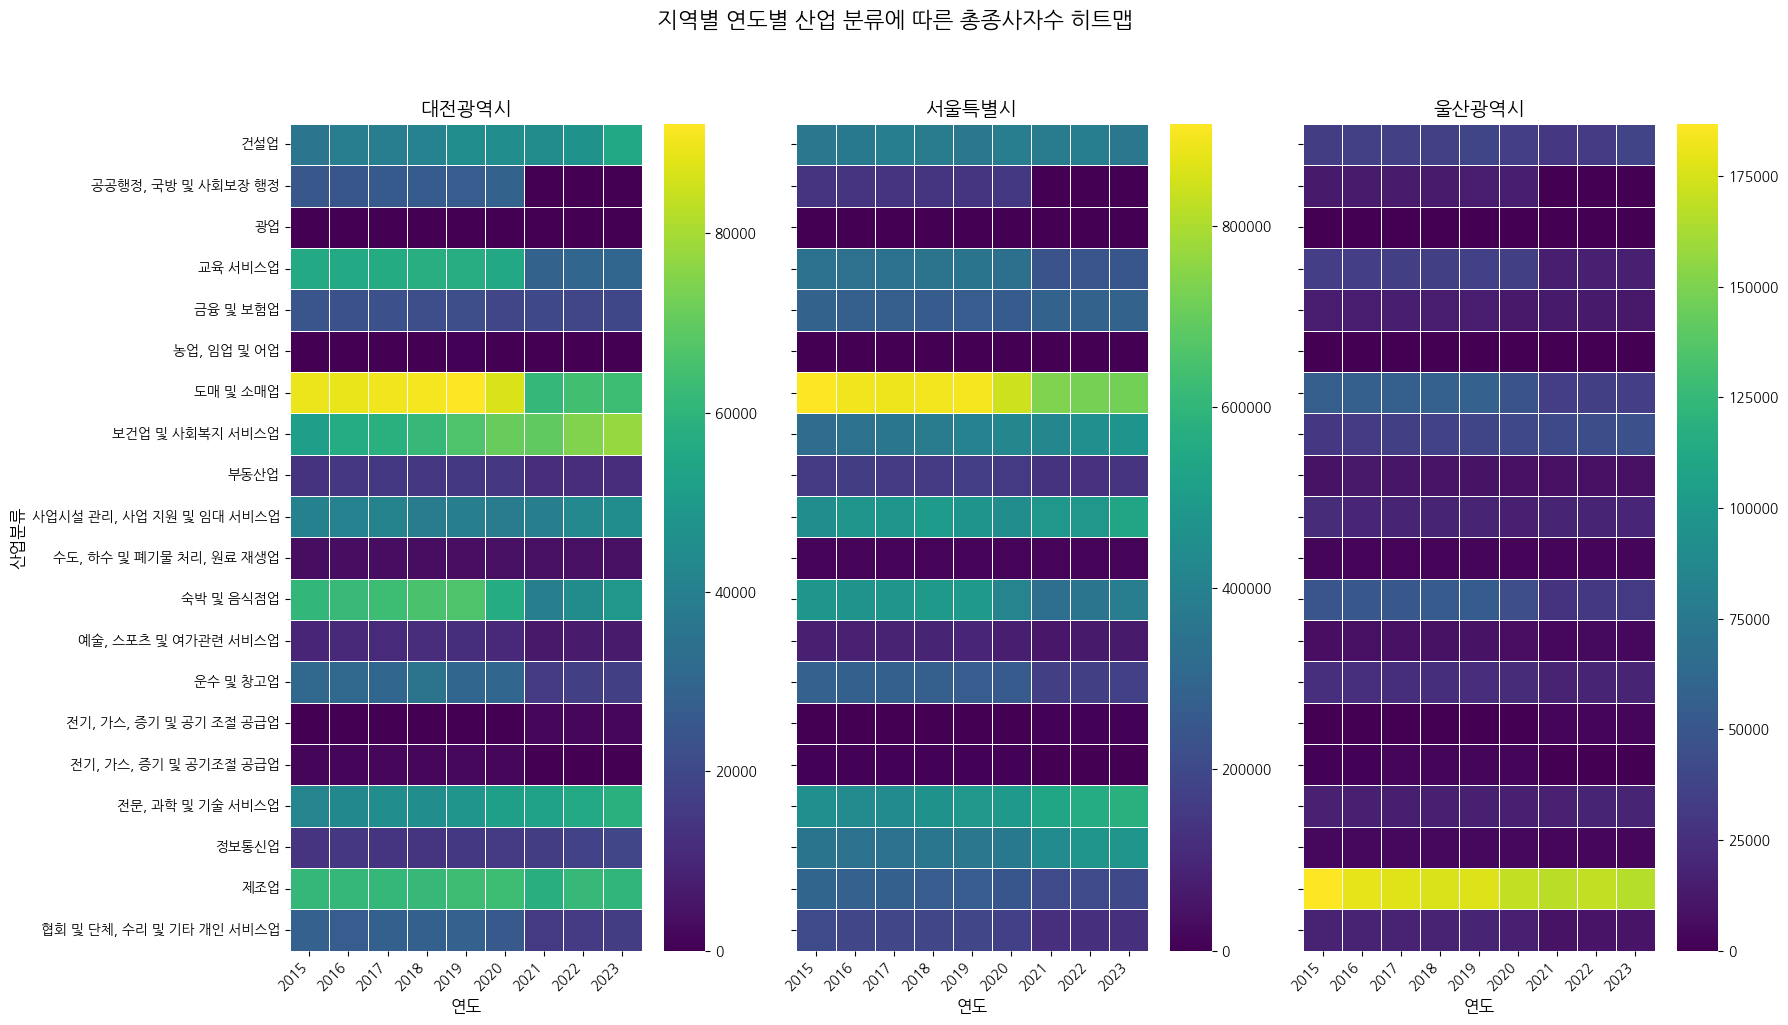

In [70]:
## 연도 및 지역별 각 산업 종사자수 변화 히트맵 시각화

# 데이터 파일 로드
load_directory = '/content/drive/MyDrive/Colab Notebooks/데이터'
file_2015_2020 = os.path.join(load_directory, '산업별 사업체수 및 종사자수(2015~2020년).csv')
file_2021_2023 = os.path.join(load_directory, '산업별 사업체수 및 종사자수(2021~2023년).csv')

try:
    # UTF-8로 먼저 시도
    biz_df_1 = pd.read_csv(file_2015_2020, header=[0, 1], encoding='utf-8-sig')
except UnicodeDecodeError:
    # UTF-8 실패 시 CP949로 다시 시도
    biz_df_1 = pd.read_csv(file_2015_2020, header=[0, 1], encoding='cp949')

try:
    # UTF-8로 먼저 시도
    biz_df_2 = pd.read_csv(file_2021_2023, header=[0, 1], encoding='utf-8-sig')
except UnicodeDecodeError:
    # UTF-8 실패 시 CP949로 다시 시도
    biz_df_2 = pd.read_csv(file_2021_2023, header=[0, 1], encoding='cp949')

print("로드 성공")
print(biz_df_1.head())
print(biz_df_2.head())


# 데이터 전처리 및 병합
def clean_and_melt(df, id_column_names, value_column_filter):
    # 컬럼 헤더를 단일 레벨로 평탄화
    df.columns = ['_'.join(map(str, col)).strip() for col in df.columns]

    # ID 변수 컬럼명 통일
    df.rename(columns={
        col: '지역' for col in df.columns if '행정구역' in col or '지역별' in col
    }, inplace=True)
    df.rename(columns={
        col: '산업분류' for col in df.columns if '산업' in col
    }, inplace=True)
    df.rename(columns={
        col: '규모' for col in df.columns if '사업체구분' in col or '규모' in col
    }, inplace=True)

    # 불필요한 행 제거
    if '산업분류' in df.columns:
        df = df[~df['산업분류'].str.contains('전체', na=False)]

    # value_vars 리스트 생성
    value_cols = [col for col in df.columns if value_column_filter in col]

    # 데이터프레임 melt
    melted_df = df.melt(id_vars=id_column_names, value_vars=value_cols, var_name='연도_key', value_name='총종사자수(명)')
    melted_df['연도'] = melted_df['연도_key'].apply(lambda x: int(x.split('_')[0]))
    melted_df.drop('연도_key', axis=1, inplace=True)
    return melted_df

# 2015-2020 데이터프레임 전처리
melted_df_1 = clean_and_melt(biz_df_1.copy(), id_column_names=['지역', '산업분류', '규모'], value_column_filter='종사자수 (명)')

# 2021-2023 데이터프레임 전처리
melted_df_2 = clean_and_melt(biz_df_2.copy(), id_column_names=['지역', '산업분류', '규모'], value_column_filter='총종사자수_계 (명)')

# '지역' 컬럼 값 통일
melted_df_1['지역'] = melted_df_1['지역'].replace({
    '서울': '서울특별시',
    '대전': '대전광역시',
    '울산': '울산광역시'
})

# 두 데이터프레임을 이어 붙이기
combined_job_data = pd.concat([melted_df_1, melted_df_2], ignore_index=True)

# '산업분류' 컬럼에서 산업코드를 제거
combined_job_data['산업분류'] = combined_job_data['산업분류'].str.replace(r'^[A-Z]\.', '', regex=True)
combined_job_data['산업분류'] = combined_job_data['산업분류'].str.replace(r'\s*\(\d+~?\d*\)', '', regex=True)

# 병합된 데이터프레임 확인
print(combined_job_data.head())
print(combined_job_data.shape)

# 시각화할 지역 및 연도 필터링
target_regions = ['서울특별시', '대전광역시', '울산광역시']
target_years = list(range(2015, 2024))
regional_job_filtered_df_sorted = combined_job_data[
    combined_job_data['지역'].isin(target_regions) &
    combined_job_data['연도'].isin(target_years)
].sort_values(by=['지역', '연도', '산업분류'])

# 필터링된 데이터프레임 확인
print(regional_job_filtered_df_sorted.head())
print(regional_job_filtered_df_sorted.shape)

## 히트맵 시각화
# 지역별 고유값 목록 가져오기
regions = regional_job_filtered_df_sorted['지역'].unique()
n_regions = len(regions)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=n_regions, figsize=(6 * n_regions, 10), sharey=True)

# 축이 1차원 배열이 아닐 경우 리스트로 변환
if n_regions == 1:
    axes = [axes]

# 전체 제목 설정
fig.suptitle('지역별 연도별 산업 분류에 따른 총종사자수 히트맵', fontsize=16, y=1.02)

for i, region in enumerate(regions):
    ax = axes[i]

    # 해당 지역 데이터 필터링
    data_region = regional_job_filtered_df_sorted[regional_job_filtered_df_sorted['지역'] == region]

    # pivot_table을 사용하여 히트맵에 적합한 형태로 변환
    heatmap_data_job = data_region.pivot_table(
        index='산업분류',
        columns='연도',
        values='총종사자수(명)',
        aggfunc='mean'
    )

    # 결측치 채우기
    heatmap_data_job = heatmap_data_job.fillna(0)

    sns.heatmap(
        heatmap_data_job,
        annot=False,
        fmt=".0f",
        cmap="viridis",
        linewidths=.5,
        cbar=True,
        ax=ax
    )

    ax.set_title(region, fontsize=14)
    ax.set_xlabel('연도', fontsize=12)
    ax.set_ylabel('산업분류' if i == 0 else '', fontsize=12)

    ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')
    ax.tick_params(axis='y', rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.98])

# 시각화 결과 저장
plt.savefig("all_regions_job_heatmap.png", dpi=300, bbox_inches="tight")

plt.show()

## 서울, 대전, 울산 지역 인구학적 분석 결과

### 1. 지역별 인구 구조 및 변화 분석 (연령, 성별, 가구 구성, 인구 밀도)

#### 서울특별시
*   **인구 규모 및 변화**: 대한민국에서 가장 인구 밀도가 높은 도시로, 총인구가 감소하는 추세를 보임
*   **연령 및 성별 분포**: 인구 피라미드를 참고하면 20대 후반에서 30대가 가장 두터운 연령층을 형성하고 있으며,
<br>고령층 인구도 꾸준히 증가 중이고 특정 연령대에서 성별 불균형이 나타나기도

*   **가구 구성**: 1인 가구의 비중이 매우 높고 꾸준히 증가하는 추세이며, 2인 가구의 비중도 상당함.
<br>전통적인 4인 이상 가구의 비중은 상대적으로 낮으며,
<br>이는 청년층 및 중장년층 1인 가구 증가와 고령화의 영향을 받았다고 해석 가능함
*   **인구 밀도**: 인구 밀도가 세 지역 중 압도적으로 높으며, 이는 주거 및 생활 환경에 큰 영향을 미칠 수 있음

#### 대전광역시
*   **인구 규모 및 변화**: 인구 밀도는 서울보다 훨씬 낮지만, 세 지역 중 중간 규모의 인구 밀도를 보이는 중
<br>인구 규모는 비교적 안정적이고 소폭적인 변화를 보임
*   **연령 및 성별 분포**: 서울에 비해 비교적 젊은 연령층의 비중이 높게 나타나며 특히 20대~40대의 인구 비중이 높음
<br>연구 및 교육 기관이 많은 지역적 특성이 반영된 것으로 보임
<br>성별 분포는 비교적 균형 잡혀 있음
*   **가구 구성**: 서울과 마찬가지로 1인 가구의 비중이 높지만,
<br>서울보다는 2~3인 가구의 비중이 상대적으로 조금 더 높게 나타남
*   **인구 밀도**: 서울보다는 낮지만 울산보다는 높은 중간 수준의 인구 밀도를 보임

#### 울산광역시
*   **인구 규모 및 변화**: 세 지역 중 인구 밀도가 가장 낮으며, 제조업 중심의 지역적 특성을 반영하여 특정 연령대의 남성 인구 비중이 상대적으로 높게 나타남 <br>총인구는 마찬가지로 소폭 감소하는 추세를 보임
*   **연령 및 성별 분포**: 생산 가능 인구(특히 남성)의 비중이 높게 나타나는 특징을 보임
<br>이는 울산 지역의 주요 산업인 제조업과 관련이 깊다고 볼 수 있음 <br>고령층 인구도 증가하는 추세로 고령화가 진행 중임
*   **가구 구성**: 1인 가구와 함께 2~4인 가구의 비중이 다른 대도시에 비해 상대적으로 높게 나타남
<br>이는 제조업 종사자 중심의 가족 구성과 관련이 있어 보임
<br>또한, 가정 및 가족에 주요한 관심이 있다고 해석 가능함
*   **인구 밀도**: 세 지역 중 가장 낮은 인구 밀도를 보이며, 산업 단지와 주거 지역의 분포가 서울 지역에 몰려 있기 때문에 인구 밀도에 영향을 미친 것으로 보임

### 2. 지역별 사회경제적 특징 분석 (산업별 종사자 수)

*   **서울**: 금융, 정보통신, 전문 서비스, 도소매 등 서비스 산업 종사자 비중이 압도적으로 높음
<br>이는 서울이 대한민국의 경제, 비즈니스 중심지임을 나타냄
<br> 반면, 제조업 종사자 비중은 상대적으로 낮은 지표를 보임
*   **대전**: 연구 개발, 교육 서비스, 공공 행정 등 지식 기반 및 서비스 산업의 비중이 높게 나타남
<br> 이는 대전의 과학 도시로서의 지역적 특징을 반영하는 것으로 해석 가능함
*   **울산**: 제조업 종사자 비중이 매우 높음
<br>이는 울산 경제의 근간을 이루는 산업 구조를 보여줌
<br>반면, 서비스업 비중은 다른 두 지역(서울, 대전)에 비해 낮음

### 3. 지역별 인구 동향 분석 (출생, 사망, 혼인, 이혼, 합계출산율)

*   **세 지역 공통**: 세 지역 모두 저출산 현상이 심화되고 있으며, 합계출산율이 매우 낮은 수준을 보이고 있음
<br>사망자 수는 고령화의 영향으로 증가 추세에 있다고 보이며 추후 자연적인 인구 감소 요인으로 작용할 것으로 보임
<br>혼인 건수는 감소 또는 정체 추세를 보이며 이혼 건수는 비교적 안정적이거나 소폭적인 변화를 보임
*   **지역별 차이**: 합계출산율은 세 지역 모두 낮지만, 지역별로 미세한 차이를 보임
<br>(대전 지역의 경우 유일하게 합계출산율이 증가한 이력이 있음)
<br>인구 유입 및 유출 등 사회적 이동에 따른 인구 변동은 지역별 산업 구조 및 주거 환경과 관련되어 있다고 볼 수 있음

### 4. 인사이트 도출 및 지역별 특징 비교

*   **서울**:
  - 초고밀도 대도시로서 청년층 1인 가구 및 고령층 인구 증가가 두드러짐
  - 서비스업 중심의 경제 구조를 가지며, 낮은 출산율과 함께 인구 감소 압력을 받는 중
  - 다양한 연령층과 가구 형태가 공존하지만, 1인 가구 증가에 따른 사회적 변화가 중요해 보임
*   **대전**:
  - 연구 및 교육 도시로서 상대적으로 젊은 인구 구조를 유지하는 데 유리한 측면이 있음
  - 지식 기반 산업 중심의 경제 활동이 활발하며, 서울보다는 안정적인 인구 동향을 보일 가능성이 있음
*   **울산**:
  - 제조업 중심 도시로서 생산 가능 연령의 남성 인구 비중이 높음
  - 가족 단위 가구 형태(4인 가구)가 상대적으로 더 유지될 수 있음
  - 극단적인 산업 구조로 인해 저출산 고령화의 영향도 점차 커지고 있음

### 5. 인구학적 페르소나 정의

위의 분석 결과를 바탕으로 각 지역의 주요 인구학적 특성을 대표하는 몇 가지 페르소나를 다음과 같이 정의할 수 있습니다. 이는 분석의 목적과 관점에 따라 다양하게 설정될 수 있습니다.

#### 서울 지역의 인구학적 페르소나

*   **페르소나 1: 서울 싱글 직장인 (20대 후반 ~ 30대 후반)**
    *   **특징**:
      - 서울에 거주하는 1인 가구
      - 주로 서비스업(IT, 금융, 전문직) 종사
      - 개인의 삶, 커리어, 여가 중시
      - 주거 비용(내집마련) 부담 높음
      - 대중교통 이용 많음
      - 낮은 출산율 및 혼인 의향
    *   **인구학적 근거**:
      - 서울의 높은 1인 가구 비중
      - 2030세대 두터운 인구층
      - 서비스업 중심 산업 구조 반영
*   **페르소나 2: 서울 베이비부머 은퇴 가구 (60대 이상)**
    *   **특징**:
      - 서울에 장기 거주
      - 은퇴했거나 은퇴 후에도 경제 활동 일부 유지
      - 2인 가구 또는 1인 가구
      - 건강 및 여가 활동에 큰 관심
      - 의료 및 복지 서비스 이용 많음
    *   **인구학적 근거**:
      - 서울 고령층 인구 증가
      - 2인 가구 및 1인 가구 형태 증가 반영
*   **페르소나 3: 서울 신혼부부 또는 영유아 자녀 가구 (30대 ~ 40대 초반)**
    *   **특징**:
      - 서울 내 주거 마련 부담
      - 자녀 양육 및 교육 관심 높음
      - 맞벌이 비중 높음, 주거 및 보육 환경 중요시
      - 낮은 합계출산율 환경에서 자녀 계획 및 양육 고민
    *   **인구학적 근거**:
      - 서울의 혼인 건수 및 출생아수 관련 시각화 지표
      - 3040세대 부부 및 소자녀 가구 형태 반영

#### 대전 지역의 인구학적 페르소나 예시

*   **페르소나 1: 대전 연구/교육 분야 종사자 가구 (30대 ~ 50대)**
    *   **특징**:
      - 대전의 연구소 및 대학 등에서 근무
      - 비교적 안정적인 소득
      - 2~4인 가구 형태
      - 자녀 교육 환경 중요시
      - 주거 환경 쾌적성 선호
    *   **인구학적 근거**:
      - 대전의 지식 기반 산업 및 교육 서비스업 비중
      - 30~50대 인구 비중
      - 비교적 안정적인 가구 구성 반영
*   **페르소나 2: 대전 청년 1인 가구 (20대 ~ 30대 초반)**
    *   **특징**:
      - 학업 또는 초기 직장 생활로 대전에 거주
      - 1인 가구 형태
      - 주거 및 생활 편의성 중요시
      - 문화 및 여가 활동에 관심
    *   **인구학적 근거**:
      - 대전의 젊은 연령층 인구  
      - 1인 가구 증가 추세 반영

#### 울산 지역의 인구학적 페르소나 예시

*   **페르소나 1: 울산 제조업 종사자 가족 (30대 ~ 50대 남성 중심)**
    *   **특징**:
      - 울산의 주요 제조업체 근무 (생산/기술직)
      - 가구원수 2~4인 이상 가족 구성 비중 높음
      - 안정적인 소득 기반
      - 자녀 교육 및 가족 중심 생활 형태
    *   **인구학적 근거**:
      - 울산의 높은 제조업 종사자 비중
      - 특정 연령대 남성 인구 및 다인 가구 비중 반영
*   **페르소나 2: 울산 고령층 부부 또는 1인 가구 (60대 이상)**
    *   **특징**:
      - 울산에 장기 거주
      - 은퇴 후 생활
      - 2인 가구 또는 1인 가구 형태
      - 건강 관리 및 지역 커뮤니티 활동에 관심
    *   **인구학적 근거**:
      - 고령층 인구 증가 추세 반영
      - 합계출산율 감소 추세 반영